<a href="https://colab.research.google.com/github/matanaaa14/mechineLearning_finalTask/blob/main/url_classification_changed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# URL Classification model using Machine Learning
### For Computer Science B.Sc. Ariel University

**By Matan Aviv**

## Introduction
In this project we will build a machine learning model that will classify URLs based on if they are malicious (phishing, malware, etc.) or benign. We will use a dataset of URLs that are labeled as either malicious or benign and use it to train a model that will be able to classify new URLs.

### Install and import libraries

In [ ]:
# Some importent libraries installtion via pip
%pip install scikit-learn
%pip install pandas
%pip install numpy
%pip install tensorflow

In [ ]:
# Importing the libraries for the project #

## Regular Libraries that's come with python
### Data Manipulation and Analysis
import pandas as pd
### Numerical Computing
import numpy as np
### Collection of Data Structures
import collections as col
### Regular Expressions
import re as regex
### URL Handling
import urllib as urlhndl
### Mathematical Operations
import math
### Socket Programming
import socket
### Plot graphs
import matplotlib.pyplot as plt

## SKLearn Libraries for Machine Learning
### Splitting the data into training and testing
from sklearn.model_selection import train_test_split
### Metrics for Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
### Preprocessing the Data
from sklearn.utils import resample
### TF-IDF Vectorizer for Text Data
from sklearn.feature_extraction.text import TfidfVectorizer
### Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
### Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
### Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
### K-Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
### Libraries for Plotting the Confusion Matrix
from sklearn.preprocessing import LabelEncoder
### Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

## Tensorflow Libraries for Deep Learning
import tensorflow as tf

## Pickle for saving the model to disk
import pickle as pkl

### Feature extraction functions
We will use the following feature extraction functions to extract features from the URLs:
1. `get_url_length`: This function returns the length of the URL.
2. `get_dot_count`: This function returns the number of dots in the URL.
3. `get_hyphen_count_in_domain`: This function returns the number of hyphens in the domain of the URL.
4. `contains_security_sensitive_words`: This function returns 1 if the URL contains security sensitive words (e.g., "login", "signin", "account", etc.) and 0 otherwise.
5. `get_directory_length`: This function returns the length of the directory part of the URL.
6. `get_sub_directory_count`: This function returns the number of subdirectories in the URL.
7. `contains_ip`: This function returns 1 if the URL contains an IP address and 0 otherwise.
8. `get_token_count_in_path`: This function returns the number of tokens in the path part of the URL.
9. `get_largest_token_length`: This function returns the length of the largest token in the path part of the URL.
10. `get_avarage_token_length`: This function returns the average length of the tokens in the path part of the URL.
11. `get_file_length`: This function returns the length of the file part of the URL.
12. `get_dot_count_in_file`: This function returns the number of dots in the file part of the URL.
13. `get_delimiter_count_in_file`: This function returns the number of delimiters in the file part of the URL.
14. `get_arguments_length`: This function returns the length of the arguments part of the URL.
15. `get_number_of_arguments`: This function returns the number of arguments in the URL.
16. `get_length_of_largest_argument_value`: This function returns the length of the largest argument value in the URL.
17. `get_max_delimiters_in_arguments`: This function returns the maximum number of delimiters in the arguments part of the URL.
18. `get_domain_features`: This function returns the following features of the domain part of the URL: length, number of dots, number of hyphens, number of digits, number of special characters, entropy, whether the domain is a subdomain, and whether the domain is an IP address.
19. `get_special_character_count`: This function returns the number of special characters in the URL.
20. `get_entropy`: This function returns the entropy of the URL.
21. `check_url_shortened`: This function returns 1 if the URL is shortened and 0 otherwise.
22. `get_port_number`: This function returns the port number of the URL, if it exists, and -1 otherwise.
23. `get_subdomain_count`: This function returns the number of subdomains in the URL.
24. `get_suspicious_tld`: This function returns 1 if the top-level domain (TLD) of the URL is suspicious (e.g., "tk", "ml", "ga", etc.) and 0 otherwise.
25. `get_numeric_ratio`: This function returns the ratio of numeric characters in the URL.
26. `get_word_count`: This function returns the number of words in the URL.
27. `get_url_is_internationalized`: This function returns 1 if the URL is internationalized and 0 otherwise.

In [ ]:
# Function to concatenate "https://" to benign URLs
def add_https(url, label):
    if label == 0:
        return "https://" + url
    else:
        return url

def ensure_scheme(url):
    if not urlhndl.parse.urlparse(url).scheme:
        url = 'https://' + url
    return url

# Feature extraction functions
def get_url_length(url):
    return len(url)

def get_dot_count(url):
    return url.count('.')

def contains_security_sensitive_words(url):
    security_sensitive_words = [
    'login', 'password', 'admin', 'root', 'secret', 'private', 'secure', 'confidential',
    'bank', 'creditcard', 'account', 'authentication', 'authorization', 'session', 'token',
    'apikey', 'ssl', 'https', 'secure', 'encrypted', 'auth', 'signin', 'signup', 'verification',
    'resetpassword', 'change-password', 'forgot-password', 'otp', '2fa', 'phishing', 'malware',
    'virus', 'trojan', 'exploit', 'hacker', 'attack', 'security', 'vulnerable', 'injection',
    'xss', 'csrf', 'dos', 'ddos', 'bruteforce', 'firewall', 'vpn', 'proxy', 'tor', 'security-question',
    'privacy-policy']
    return int(any(word in url for word in security_sensitive_words))

def get_directory_length(url):
    url = ensure_scheme(url)
    path = urlhndl.parse.urlparse(url).path
    return len(path)

def get_sub_directory_count(url):
    url = ensure_scheme(url)
    path = urlhndl.parse.urlparse(url).path
    return path.count('/') - 1

def get_token_count_in_path(url):
    url = ensure_scheme(url)
    path = urlhndl.parse.urlparse(url).path
    tokens = path.split('/')
    return len(tokens) - 1

def get_largest_token_length(url):
    url = ensure_scheme(url)
    path = urlhndl.parse.urlparse(url).path
    tokens = path.split('/')
    if tokens:
        return max(len(token) for token in tokens)
    return 0

def get_average_token_length(url):
    url = ensure_scheme(url)
    path = urlhndl.parse.urlparse(url).path
    tokens = [token for token in path.split('/') if token]
    if tokens:
        return np.mean([len(token) for token in tokens])
    return 0

def get_file_length(url):
    url = ensure_scheme(url)
    path = urlhndl.parse.urlparse(url).path
    filename = path.split('/')[-1]
    return len(filename)

def get_dot_count_in_file(url):
    url = ensure_scheme(url)
    path = urlhndl.parse.urlparse(url).path
    filename = path.split('/')[-1]
    return filename.count('.')

def get_delimiter_count_in_file(url):
    path = urlhndl.parse.urlparse(url).path
    filename = path.split('/')[-1]
    delimiters = ['.', '_', '-']
    return sum(filename.count(delimiter) for delimiter in delimiters)

def get_arguments_length(url):
    url = ensure_scheme(url)
    query = urlhndl.parse.urlparse(url).query
    return len(query)

def get_number_of_arguments(url):
    url = ensure_scheme(url)
    query = urlhndl.parse.urlparse(url).query
    return len(urlhndl.parse.parse_qs(query))

def get_length_of_largest_argument_value(url):
    url = ensure_scheme(url)
    query = urlhndl.parse.urlparse(url).query
    params = urlhndl.parse.parse_qs(query)
    if params:
        return max(len(max(values, key=len)) for values in params.values())
    return 0

def get_max_delimiters_in_arguments(url):
    url = ensure_scheme(url)
    query = urlhndl.parse.urlparse(url).query
    params = urlhndl.parse.parse_qs(query)
    delimiters = ['&', '=', '-', '_']
    if params:
        return max(sum(value.count(delimiter) for delimiter in delimiters) for values in params.values() for value in values)
    return 0


def get_hyphen_count_in_domain(url):
    url = ensure_scheme(url)
    domain = urlhndl.parse.urlparse(url).netloc
    return domain.count('-')

def contains_ip(url):
    url = ensure_scheme(url)
    domain = urlhndl.parse.urlparse(url).netloc
    try:
        socket.inet_aton(domain)
        return 1
    except:
        return 0

def get_domain_features(url):
    url = ensure_scheme(url)
    domain = urlhndl.parse.urlparse(ensure_scheme(url)).netloc
    tokens = domain.split('.')

    # Domain Length
    domain_length = len(domain)

    # Count of Tokens in the Domain
    token_count = len(tokens)

    # Length of Largest Token in the Domain
    largest_token_length = max(len(token) for token in tokens) if tokens else 0

    # Average Domain Token Length
    average_token_length = sum(len(token) for token in tokens) / len(tokens) if tokens else 0

    return domain_length, token_count, largest_token_length, average_token_length

# New feature extraction functions
def get_special_character_count(url):
    special_characters = ['@', '=', '+', '*', '?', '&', '%', '$', '#', '!']
    return sum(url.count(char) for char in special_characters)

def get_entropy(url):
    # Count the frequency of each character in the string
    freq = col.Counter(url)
    # Calculate the probabilities
    probs = [count / len(url) for count in freq.values()]
    # Calculate the Shannon entropy
    entropy = -sum(p * math.log(p, 2) for p in probs if p > 0)
    return entropy

def check_url_shortened(url):
    shortened_services = ['bit.ly', 'tinyurl.com', 'goo.gl', 'ow.ly', 't.co']
    url = ensure_scheme(url)
    domain = urlhndl.parse.urlparse(url).netloc
    return int(domain in shortened_services)

def get_subdomain_count(url):
    url = ensure_scheme(url)
    domain_parts = urlhndl.parse.urlparse(url).netloc.split('.')
    # Count as subdomains any parts beyond the second-level domain and TLD
    return max(0, len(domain_parts) - 2)

def get_suspicious_tld(url):
    suspicious_tlds = ['xyz', 'top', 'loan', 'win', 'club']
    url = ensure_scheme(url)
    tld = urlhndl.parse.urlparse(url).netloc.split('.')[-1]
    return int(tld in suspicious_tlds)

def get_numeric_ratio(url):
    numeric_chars = sum(c.isdigit() for c in url)
    return numeric_chars / len(url) if len(url) > 0 else 0

def get_word_count(url):
    words = regex.findall(r'\w+', url)
    return len(words)

def is_https(url, timeout=0.5):
    return int(url.startswith("https"))

### Now load the dataset and do some preprocessing on it
The dataset is a CSV file with two columns: `url` and `label`. The `url` column contains the URL and the `label` column contains the label of the URL. The label is 1 if the URL is malicious and 0 if the URL is benign. Since the dataset is huge (more than 1 million rows), we will only use a small subset of it for this project (150,000 rows for each class, 300,000 rows in total).

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Verify the file exists
import os
print(os.listdir('/content/drive/MyDrive'))

# Load the dataset
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/url_dataset_updated.csv')
print(df.head())


# Drop all duplicates from df
df = df.drop_duplicates()

# Reset the index after dropping duplicates
df = df.reset_index(drop=True)

# Name of the URL column, change this if your dataset has a different column name
url_column_name = 'URL'

# Apply the function to the URL column
df[url_column_name] = df.apply(lambda row: add_https(row[url_column_name], row['Label']), axis=1)

# Separate the dataset into malicious and benign
malicious_df = df[df['Label'] == 1]
benign_df = df[df['Label'] == 0]

# Randomly sample 150,000 entries from each
malicious_sampled_df = resample(malicious_df, n_samples=150000, random_state=42)
benign_sampled_df = resample(benign_df, n_samples=150000, random_state=42)

# Combine the sampled data
balanced_df = pd.concat([malicious_sampled_df, benign_sampled_df])

# Shuffle the combined dataset to mix malicious and benign URLs
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print('Balanced Dataset Shape:', balanced_df.shape)
print('Balanced Dataset Distribution:', balanced_df['Label'].value_counts())
print('Balanced Dataset Head (First 10 Rows):')
print(balanced_df.head(10))

# Now, balanced_df contains the balanced dataset ready for further processing

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
['מלאלה זוכת פרס נובל לשלום.gdoc', 'Classroom', 'WebSite4.sln', 'Desktop', 'אתרים', 'WebSite9.sln', 'WebSite9', 'גלריה2', 'cheek', 'חומר למידה לקראת מבדק ראשון.docx.pdf', 'חזרה למבחן בתנך.pdf', 'חזרה למבחן בתנך.gdoc', 'Click this link to add winerich as friend in Brawl Stars!', 'דוגמה לmasterPage.gdoc', 'עיצוב מסגרת האתר.gdoc', 'charsJava.gdoc', 'WebSite21', 'java1', 'הגשת הצעה לפרויקט אישי במדעים.docx', 'הגשת הצעה לפרויקט אישי במדעים.gdoc', 'חיבור מאגר הנתונים לתכנית (1).gdoc', '806.pdf', '806.gdoc', 'animals', 'FINAL.PROJECT.ANIMALS', 'QueueTJava (1).gdoc', 'QueueTJava.gdoc', '19-04-2020-16.56.23(1).pdf', '17-04-2020-14.20.27(2).pdf', 'עזרא א-ג סיכום לתלמידים.gdoc', 'WhatsApp Image 2020-08-25 at 21.18.29 (1).jpeg', 'CamScanner 09-13-2020 20.40.25.pdf', '3.1 אלקטרוסטטיקה - ייצוגי השדה החשמלי _אלי- לתלמיד.gdoc', 'דף קווי שדה.gdoc', 'מטלה 19_א_נגדים אוהמיים .g

## Start testing with the options
**NOTE:** We'll split the truncated dataset into a training set and a test set (80% training, 20% test) and use the training set to train the model and the test set to evaluate the model.

### Feature extraction preprocessing
We'll get the features from the URLs using the feature extraction functions.

In [ ]:
# Apply feature extraction
print('Feature extraction...')
features = balanced_df['URL'].apply(lambda x: pd.Series({
    'url_length': get_url_length(x),
    'dot_count': get_dot_count(x),
    'hyphen_count_domain': get_hyphen_count_in_domain(x),
    'security_sensitive_words': contains_security_sensitive_words(x),
    'directory_length': get_directory_length(x),
    'sub_directory_count': get_sub_directory_count(x),
    'token_count_path': get_token_count_in_path(x),
    'largest_token_length': get_largest_token_length(x),
    'average_token_length': get_average_token_length(x),
    'file_length': get_file_length(x),
    'contains_ip': contains_ip(x),
    'dot_count_in_file': get_dot_count_in_file(x),
    'delimiter_count_in_file': get_delimiter_count_in_file(x),
    'arguments_length': get_arguments_length(x),
    'number_of_arguments': get_number_of_arguments(x),
    'length_of_largest_argument_value': get_length_of_largest_argument_value(x),
    'max_delimiters_in_arguments': get_max_delimiters_in_arguments(x),
    'special_character_count': get_special_character_count(x),
    'entropy': get_entropy(x),
    'url_shortened': check_url_shortened(x),
    'subdomain_count': get_subdomain_count(x),
    'suspicious_tld': get_suspicious_tld(x),
    'numeric_ratio': get_numeric_ratio(x),
    'domain_length': get_domain_features(x)[0],
    'domain_token_count': get_domain_features(x)[1],
    'largest_domain_token_length': get_domain_features(x)[2],
    'average_domain_token_length': get_domain_features(x)[3],
    'word_count': get_word_count(x),
    'is_https': is_https(x)
}))

# Concatenate original DF with features
balanced_df = pd.concat([balanced_df, features], axis=1)

# Regex tokenization function
def tokenize_url(url):
    # Tokenize the URL using regex
    tokens = regex.findall(r'\w+', url)
    return ' '.join(tokens)

# Tokenize the URLs
print('Tokenizing URLs...')
balanced_df['URL'] = balanced_df['URL'].apply(tokenize_url)
print('Tokenization complete.')

print('Balanced Dataset Shape:', balanced_df.shape)
print('Balanced Dataset:')
print(balanced_df)

Feature extraction...
Tokenizing URLs...
Tokenization complete.
Balanced Dataset Shape: (300000, 31)
Balanced Dataset:
                                                      URL  Label  url_length  \
0       http etransfers interac ca ssl net sh 2o05I9 b...      1        65.0   
1       http betterhealthsmoothies com Adobe adobe 3D6...      1        58.0   
2       http lloydsbank deregister payee secure auth c...      1        60.0   
3                                        https archive md      0        18.0   
4                             https pkg00 atx netgate com      0        29.0   
...                                                   ...    ...         ...   
299995         https infomation fb service e82443 repl co      1        44.0   
299996                     https img 1000736 ad score com      0        32.0   
299997                  http sosyalsat com help home html      1        35.0   
299998  https storageapi fleek co 12678f8a 04f9 4b69 a...      1        83.0   
2

### TF-IDF Vectorizer preprocessing
We will start by using the TF-IDF vectorizer to convert the URLs into numerical features for preprocessing, and split the dataset into a training set and a test set.

In [ ]:
# Extracting TF-IDF features from URLs
tfidf_vectorizer = TfidfVectorizer(max_features=500)  # Limiting to top 5000 features

# Fit and transform the TF-IDF vectorizer
print('Fitting and transforming the TF-IDF Vectorizer (max_features=5000) to the URLs in the dataset...')
tfidf_features = tfidf_vectorizer.fit_transform(balanced_df['URL'])
print('TF-IDF Vectorization complete.')

# Convert TF-IDF features from a sparse matrix to a dense format and then to an np.ndarray
print('Converting TF-IDF features from a sparse matrix to a dense format and then to an np.ndarray...')
tfidf_dense = np.asarray(tfidf_features.todense())
print('Conversion complete.')

# Define X for numerical features
X_numerical = balanced_df.drop(['Label', 'URL'], axis=1).values  # Make sure this matches your feature extraction output

# Combining TF-IDF features with numerical features
print('Combining TF-IDF features with numerical features...')
X_combined = np.hstack((X_numerical, tfidf_dense))
print('Combination complete.')

# Define y
y = balanced_df['Label'].values

# Save the TF-IDF vectorizer to disk
print('Saving the TF-IDF Vectorizer to disk...')
with open('tfidf_vectorizer.pkl', 'wb') as f:
    pkl.dump(tfidf_vectorizer, f)
print('TF-IDF Vectorizer saved to disk.')

# Split the data into training and testing sets
print('Splitting the data into training and testing sets...')
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)
print('Data split complete.')

Fitting and transforming the TF-IDF Vectorizer (max_features=5000) to the URLs in the dataset...
TF-IDF Vectorization complete.
Converting TF-IDF features from a sparse matrix to a dense format and then to an np.ndarray...
Conversion complete.
Combining TF-IDF features with numerical features...
Combination complete.
Saving the TF-IDF Vectorizer to disk...
TF-IDF Vectorizer saved to disk.
Splitting the data into training and testing sets...
Data split complete.


### Logistic Regression model
We will use the logistic regression model to classify the URLs and evaluate the model using the test set. We'll use 10,000 iterations.

In [ ]:
# Model Training with Logistic Regression
print('Training the Logistic Regression model with max_iter=10000 and random_state=42...')
lr_model = LogisticRegression(random_state=42, max_iter=10000) # Increase max_iter if the model does not converge
lr_model.fit(X_train, y_train)
print('Logistic Regression model training complete.')

print('Saving the Logistic Regression model to disk...')

# Save the model to disk
with open('logistic_regression_model.pkl', 'wb') as f:
    pkl.dump(lr_model, f)

print('Logistic Regression model saved to disk.')

Training the Logistic Regression model with max_iter=10000 and random_state=42...
Logistic Regression model training complete.
Saving the Logistic Regression model to disk...
Logistic Regression model saved to disk.


#### Making predictions based on thresholds

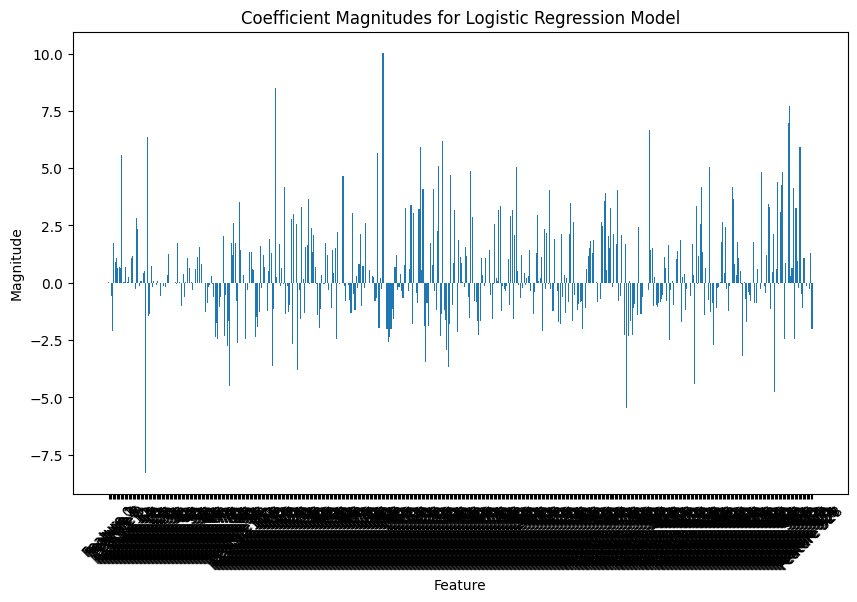

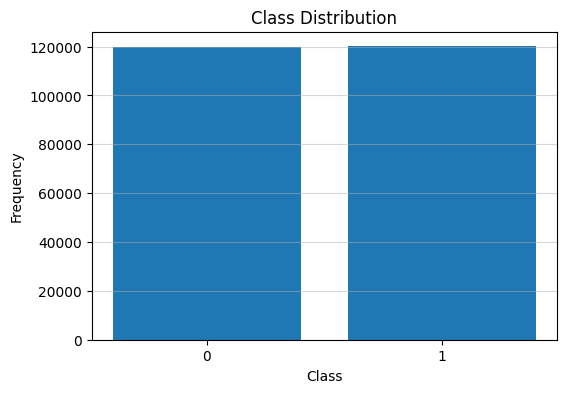

Making predictions with the Logistic Regression model...
Threshold: 0.05
Accuracy: 0.84815
Confusion Matrix:
 [[21266  8796]
 [  315 29623]]
Precision: 0.7710507821650746
Recall: 0.9894782550604583
False Positive Rate: 0.2925953030403832
False Negative Rate: 0.01052174493954172


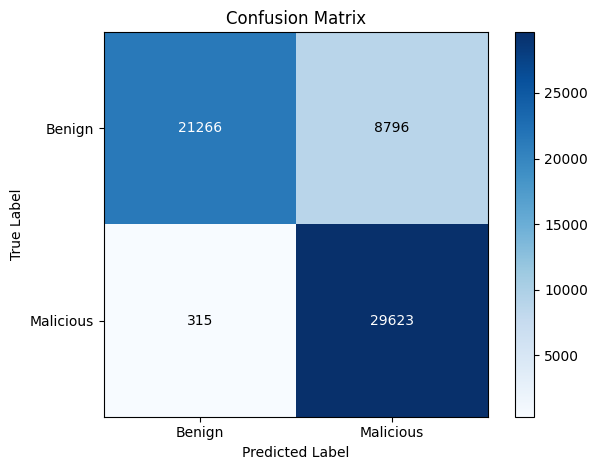

Threshold: 0.1
Accuracy: 0.9222
Confusion Matrix:
 [[26068  3994]
 [  674 29264]]
Precision: 0.8799085934211318
Recall: 0.9774868060658695
False Positive Rate: 0.13285875856563104
False Negative Rate: 0.022513193934130538


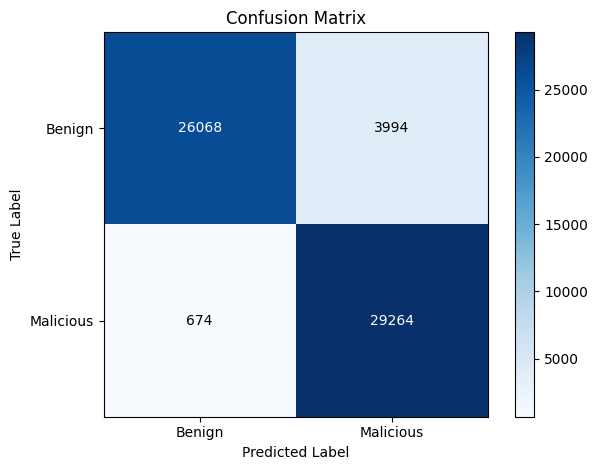

Threshold: 0.15
Accuracy: 0.9482833333333334
Confusion Matrix:
 [[27835  2227]
 [  876 29062]]
Precision: 0.9288248266163828
Recall: 0.9707395283586078
False Positive Rate: 0.07408023418268911
False Negative Rate: 0.02926047164139221


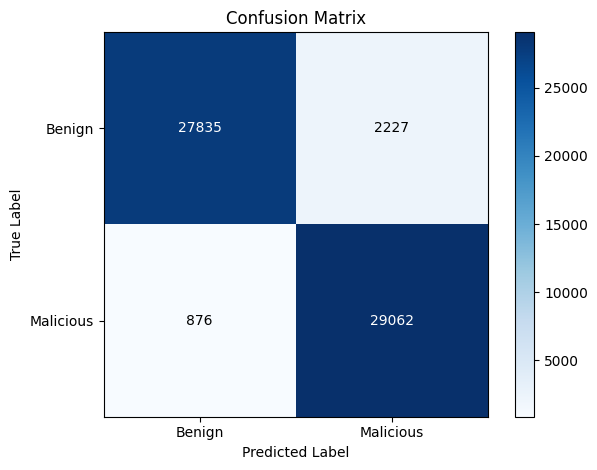

Threshold: 0.2
Accuracy: 0.9586833333333333
Confusion Matrix:
 [[28629  1433]
 [ 1046 28892]]
Precision: 0.9527452596867271
Recall: 0.965061126327744
False Positive Rate: 0.04766815248486461
False Negative Rate: 0.034938873672255996


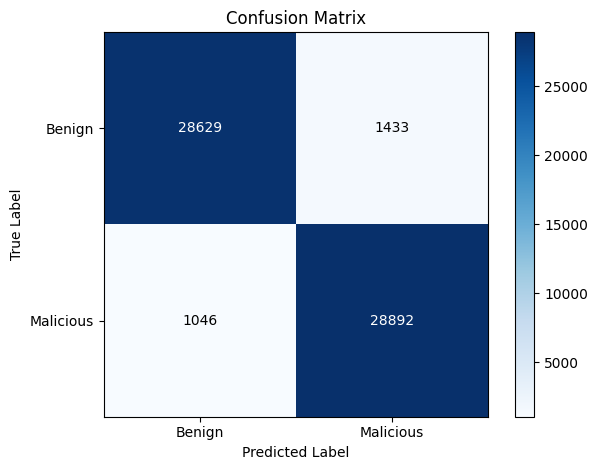

Threshold: 0.25
Accuracy: 0.9638
Confusion Matrix:
 [[29045  1017]
 [ 1155 28783]]
Precision: 0.9658724832214766
Recall: 0.9614202685550137
False Positive Rate: 0.033830084492049765
False Negative Rate: 0.038579731444986304


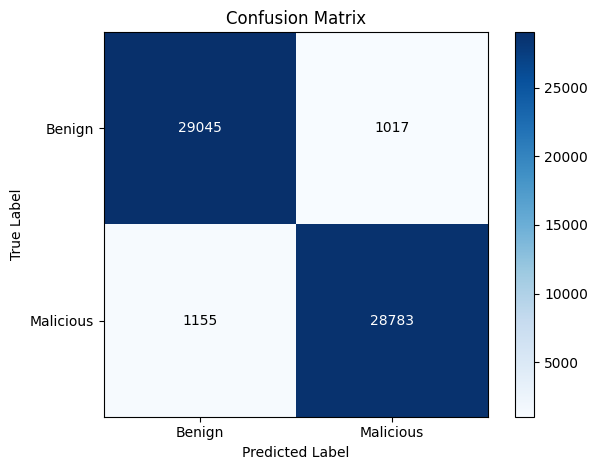

Threshold: 0.3
Accuracy: 0.9661833333333333
Confusion Matrix:
 [[29282   780]
 [ 1249 28689]]
Precision: 0.9735315076860429
Recall: 0.9582804462555949
False Positive Rate: 0.025946377486527842
False Negative Rate: 0.041719553744405106


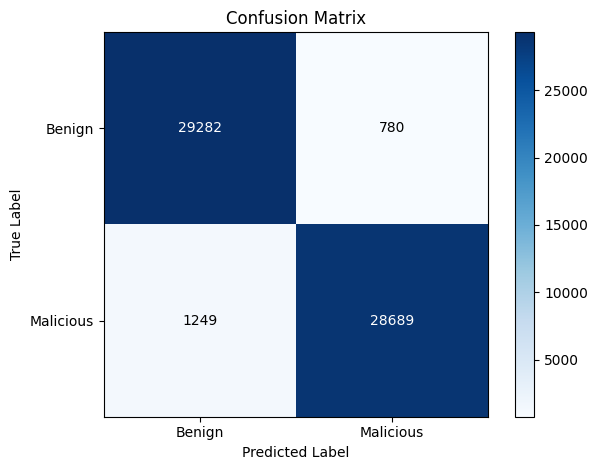

Threshold: 0.35
Accuracy: 0.9680166666666666
Confusion Matrix:
 [[29467   595]
 [ 1324 28614]]
Precision: 0.9796295662295867
Recall: 0.9557752688890373
False Positive Rate: 0.019792428980107777
False Negative Rate: 0.04422473111096266


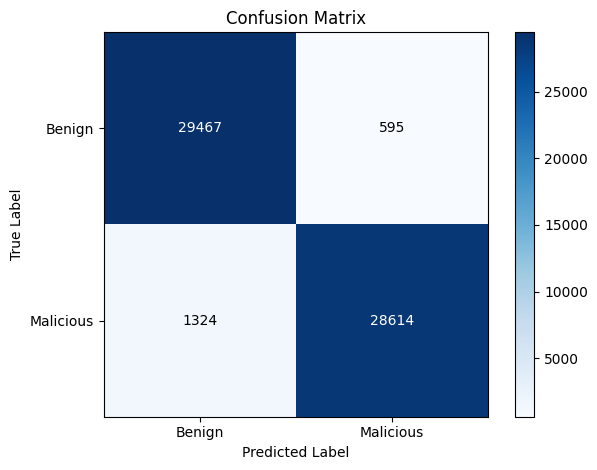

Threshold: 0.4
Accuracy: 0.9684
Confusion Matrix:
 [[29581   481]
 [ 1415 28523]]
Precision: 0.9834160805406151
Recall: 0.9527356536842808
False Positive Rate: 0.01600026611669217
False Negative Rate: 0.04726434631571915


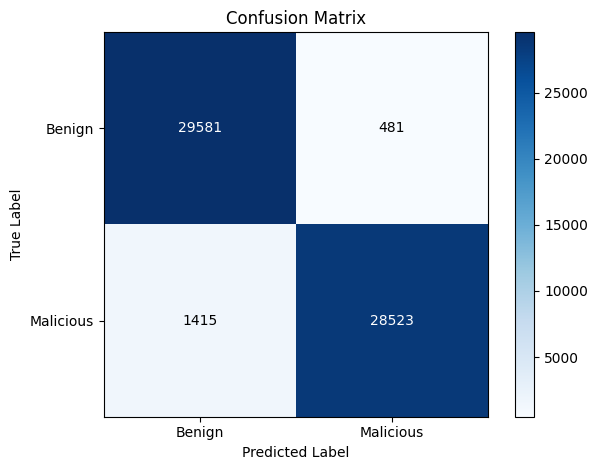

Threshold: 0.45
Accuracy: 0.9683166666666667
Confusion Matrix:
 [[29665   397]
 [ 1504 28434]]
Precision: 0.986230099545628
Recall: 0.9497628432092993
False Positive Rate: 0.013206040848912248
False Negative Rate: 0.05023715679070078


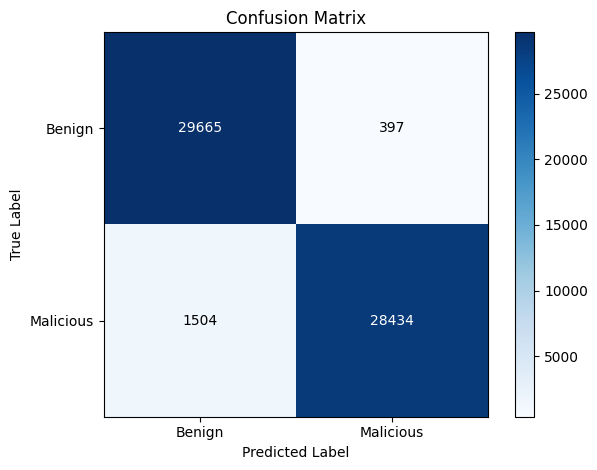

Threshold: 0.5
Accuracy: 0.9681333333333333
Confusion Matrix:
 [[29730   332]
 [ 1580 28358]]
Precision: 0.9884280237016382
Recall: 0.9472242634778543
False Positive Rate: 0.011043842725034928
False Negative Rate: 0.05277573652214577


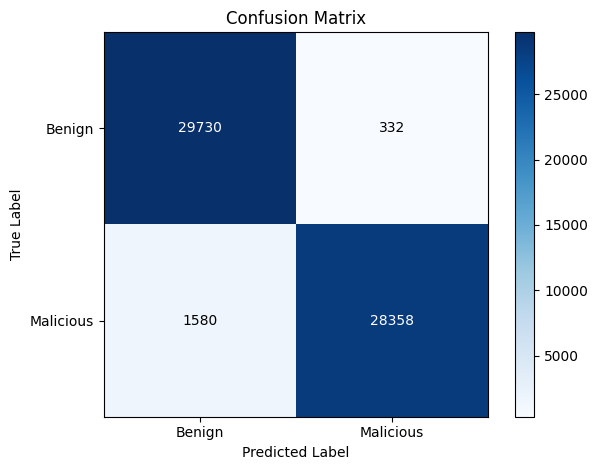

Threshold: 0.55
Accuracy: 0.9683
Confusion Matrix:
 [[29790   272]
 [ 1630 28308]]
Precision: 0.9904828551434569
Recall: 0.9455541452334826
False Positive Rate: 0.009047967533763555
False Negative Rate: 0.05444585476651747


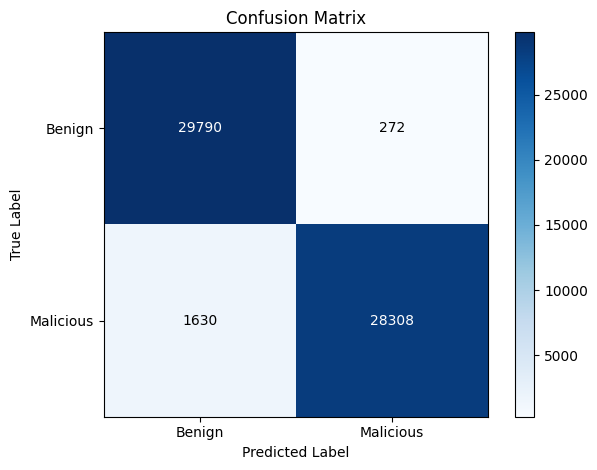

Threshold: 0.6
Accuracy: 0.96805
Confusion Matrix:
 [[29846   216]
 [ 1701 28237]]
Precision: 0.992408533370822
Recall: 0.9431825773264747
False Positive Rate: 0.007185150688576941
False Negative Rate: 0.056817422673525284


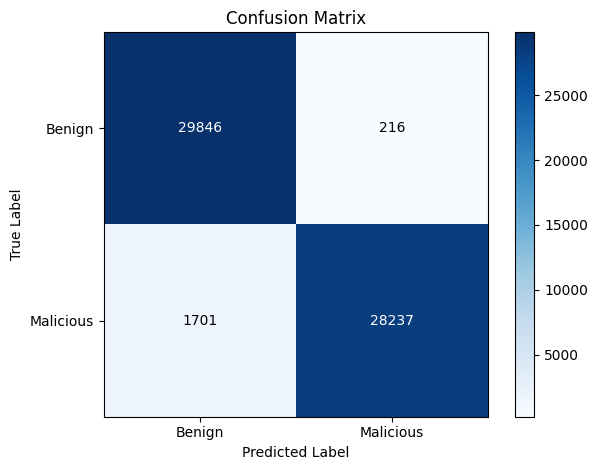

Threshold: 0.65
Accuracy: 0.96735
Confusion Matrix:
 [[29883   179]
 [ 1780 28158]]
Precision: 0.9936831704132406
Recall: 0.9405437905003674
False Positive Rate: 0.005954360987292928
False Negative Rate: 0.059456209499632574


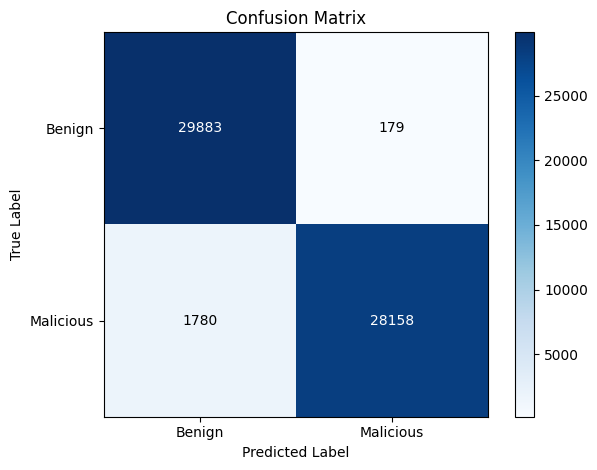

Threshold: 0.7
Accuracy: 0.9663166666666667
Confusion Matrix:
 [[29907   155]
 [ 1866 28072]]
Precision: 0.9945088036277323
Recall: 0.937671187120048
False Positive Rate: 0.005156010910784379
False Negative Rate: 0.0623288128799519


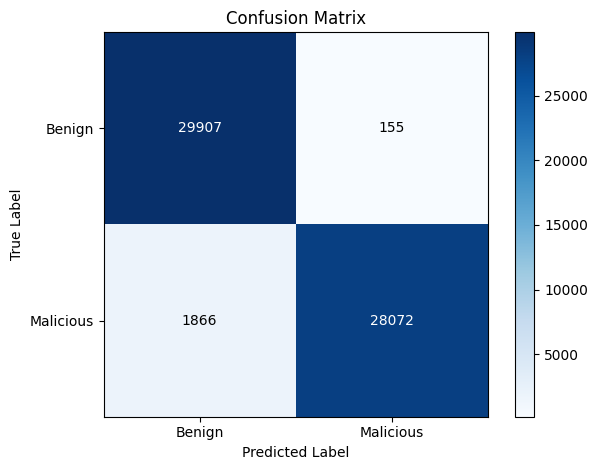

Threshold: 0.75
Accuracy: 0.9653666666666667
Confusion Matrix:
 [[29942   120]
 [ 1958 27980]]
Precision: 0.995729537366548
Recall: 0.9345981695504042
False Positive Rate: 0.003991750382542745
False Negative Rate: 0.06540183044959583


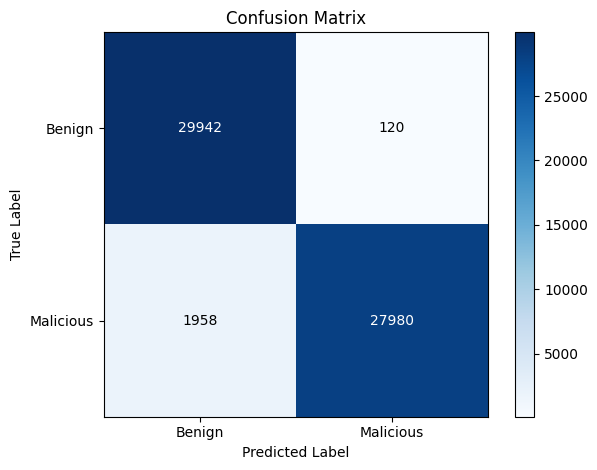

Threshold: 0.8
Accuracy: 0.9642666666666667
Confusion Matrix:
 [[29975    87]
 [ 2057 27881]]
Precision: 0.9968893020594966
Recall: 0.9312913354265482
False Positive Rate: 0.00289401902734349
False Negative Rate: 0.0687086645734518


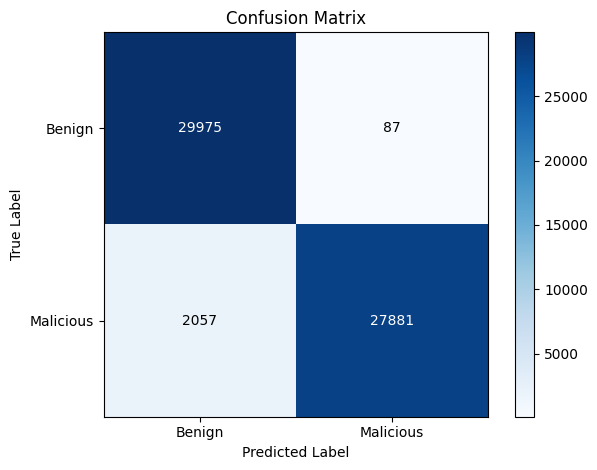

Threshold: 0.85
Accuracy: 0.96285
Confusion Matrix:
 [[30019    43]
 [ 2186 27752]]
Precision: 0.9984529591653175
Recall: 0.9269824303560692
False Positive Rate: 0.0014303772204111503
False Negative Rate: 0.07301756964393079


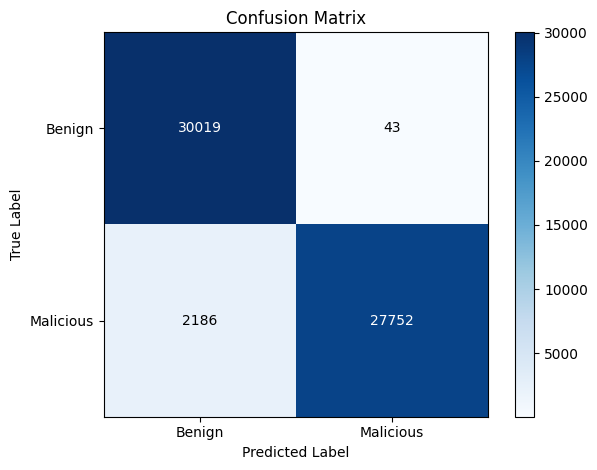

Threshold: 0.9
Accuracy: 0.9603333333333334
Confusion Matrix:
 [[30036    26]
 [ 2354 27584]]
Precision: 0.9990583122057226
Recall: 0.9213708330549802
False Positive Rate: 0.000864879249550928
False Negative Rate: 0.0786291669450197


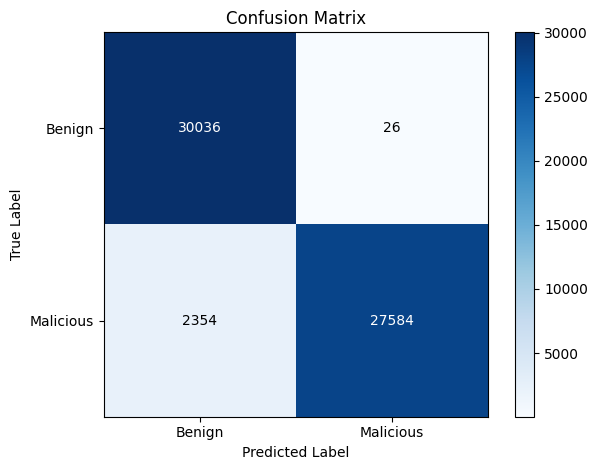

Threshold: 0.95
Accuracy: 0.9545333333333333
Confusion Matrix:
 [[30047    15]
 [ 2713 27225]]
Precision: 0.9994493392070485
Recall: 0.9093793840603914
False Positive Rate: 0.0004989687978178432
False Negative Rate: 0.09062061593960852


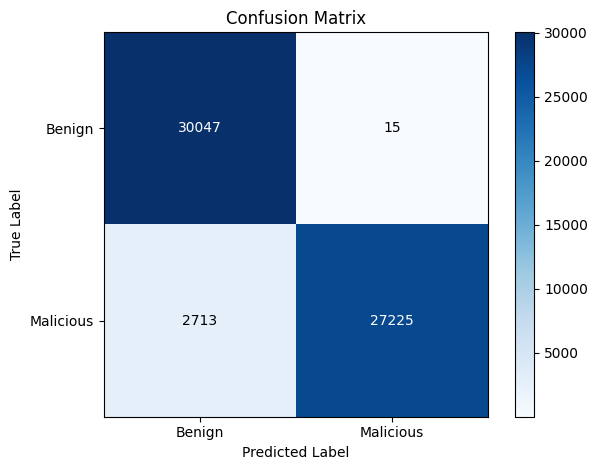

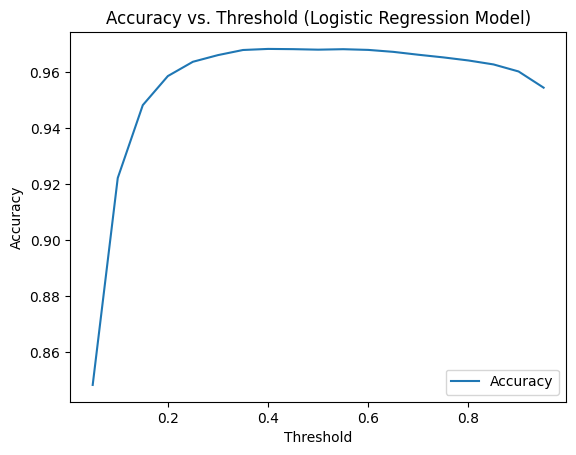

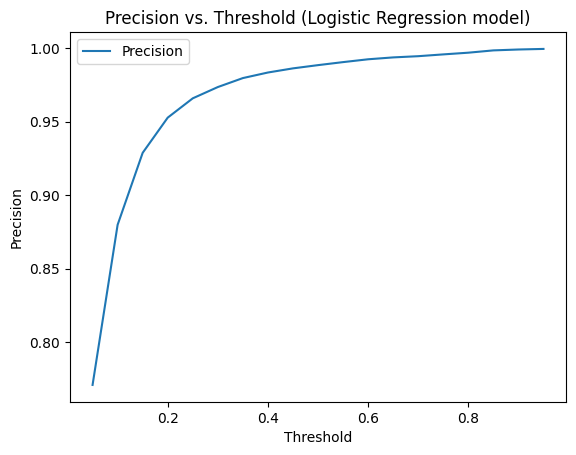

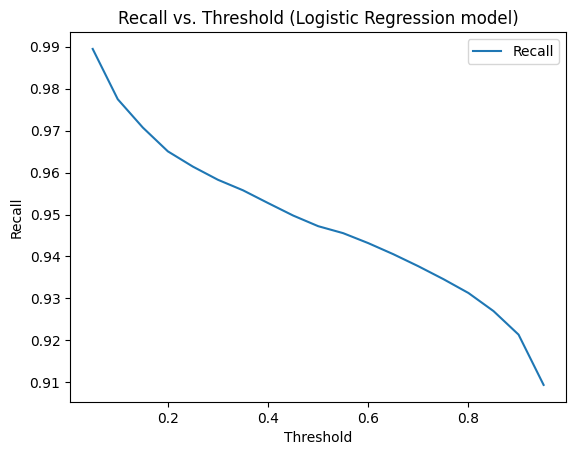

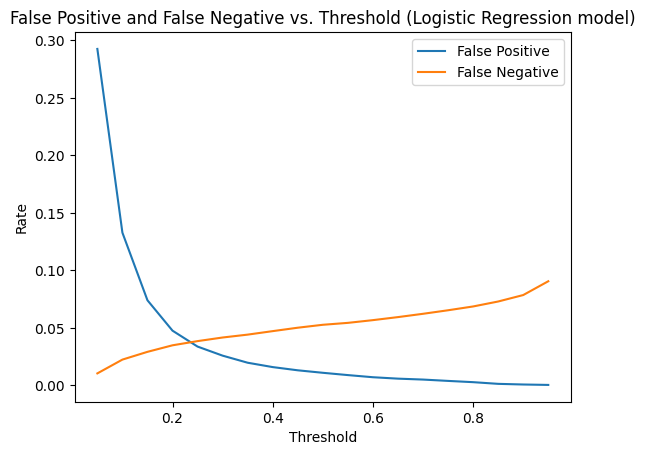

Maximum Accuracy: 0.9684
Best Threshold: 0.4


In [ ]:
def plot_confusion_matrix(model, X_test, y_test, threshold=0.5):
    cm = confusion_matrix(y_test, (model.predict_proba(X_test)[:, 1] >= threshold).astype(int))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    classes = ['Benign', 'Malicious']  # Class labels
    plt.xticks(ticks=[0, 1], labels=classes)
    plt.yticks(ticks=[0, 1], labels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Add text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()

# Coefficient Magnitudes
coefficients = lr_model.coef_[0]
feature_names = [f'Feature {i}' for i in range(len(coefficients))]
plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients)
plt.title('Coefficient Magnitudes for Logistic Regression Model')
plt.xlabel('Feature')
plt.ylabel('Magnitude')
plt.xticks(rotation=45)
plt.show()

# Class Distribution
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
class_names = label_encoder.classes_
plt.figure(figsize=(6, 4))
plt.hist(y_train_encoded, bins=np.arange(len(np.unique(y_train_encoded)) + 1) - 0.5, rwidth=0.8)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(np.arange(len(class_names)), class_names)
plt.grid(axis='y', alpha=0.5)
plt.show()

# Predictions and Evaluation
print('Making predictions with the Logistic Regression model...')

# Initialize lists to store evaluation metrics
accuracy_list = []
precision_list = []
recall_list = []
false_positive_list = []
false_negative_list = []

# Define the thresholds to test
thresholds = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

max_accuracy = 0.0
best_threshold = 0.0

for threshold in thresholds:
    print('Threshold:', threshold)
    y_pred = (lr_model.predict_proba(X_test)[:, 1] >= threshold).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    false_positive = confusion[0, 1] / (confusion[0, 1] + confusion[0, 0])
    false_negative = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])

    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion)
    print("Precision:", precision)
    print("Recall:", recall)
    print("False Positive Rate:", false_positive)
    print("False Negative Rate:", false_negative)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    false_positive_list.append(false_positive)
    false_negative_list.append(false_negative)

    # Plot confusion matrix
    plot_confusion_matrix(lr_model, X_test, y_test, threshold)

    # Update max accuracy and best threshold if current accuracy is higher
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_threshold = threshold

# Plotting accuracy vs. threshold
plt.plot(thresholds, accuracy_list, label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold (Logistic Regression Model)')
plt.legend()
plt.show()

# Plotting precision vs. threshold
plt.plot(thresholds, precision_list, label='Precision')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision vs. Threshold (Logistic Regression model)')
plt.legend()
plt.show()

# Plotting recall vs. threshold
plt.plot(thresholds, recall_list, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall vs. Threshold (Logistic Regression model)')
plt.legend()
plt.show()

# Plotting false positive and false negative rates vs. threshold
plt.plot(thresholds, false_positive_list, label='False Positive')
plt.plot(thresholds, false_negative_list, label='False Negative')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('False Positive and False Negative vs. Threshold (Logistic Regression model)')
plt.legend()
plt.show()

# Display maximum accuracy and best threshold
print('Maximum Accuracy:', max_accuracy)
print('Best Threshold:', best_threshold)

### Guassian Naive Bayes model
We will use the Guassian Naive Bayes model to classify the URLs and evaluate the model using the test set.

In [ ]:
# Model Training with GaussianNB
print('Training the Gaussian Naive Bayes model with the combined features...')
gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)
print('Gaussian Naive Bayes model training complete.')

print('Saving the Gaussian Naive Bayes model to disk...')

# Save the model to disk
with open('gaussian_nb_model.pkl', 'wb') as f:
    pkl.dump(gnb_model, f)

print('Gaussian Naive Bayes model saved to disk.')

Training the Gaussian Naive Bayes model with the combined features...
Gaussian Naive Bayes model training complete.
Saving the Gaussian Naive Bayes model to disk...
Gaussian Naive Bayes model saved to disk.


#### Functions for graphs

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    plt.xticks(rotation=45)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show()

# Define a function to plot ROC curve with custom threshold
def plot_roc_curve_threshold(y_true, y_score, threshold):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

# Define a function to plot precision-recall curve with custom threshold
def plot_precision_recall_curve_threshold(y_true, y_score, threshold):
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    average_precision = average_precision_score(y_true, y_score)
    plt.figure()
    lw = 2
    plt.plot(recall, precision, color='blue',
             lw=lw, label='Precision-Recall curve (AP = %0.2f)' % average_precision)
    plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

#### Make predictions and evaluate the model

Making predictions with the Gaussian Naive Bayes model...
Threshold: 0.05
Accuracy: 0.9528666666666666
Confusion Matrix:
 [[29015  1047]
 [ 1781 28157]]
Precision: 0.964148746747021
Recall: 0.94051038813548
False Positive Rate: 0.03482802208768545
False Negative Rate: 0.05948961186452001


<ipython-input-11-26d7ffa608ad>:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


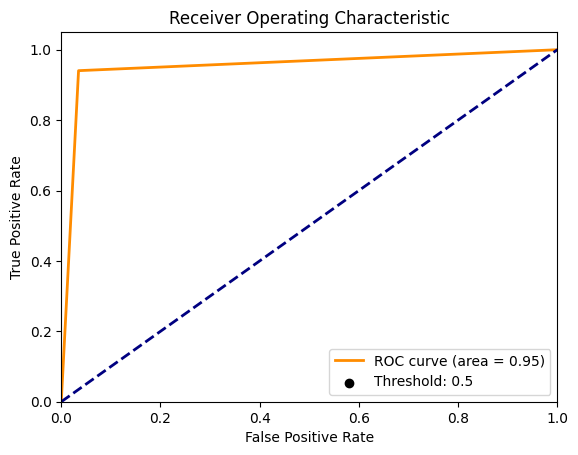

<ipython-input-11-26d7ffa608ad>:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


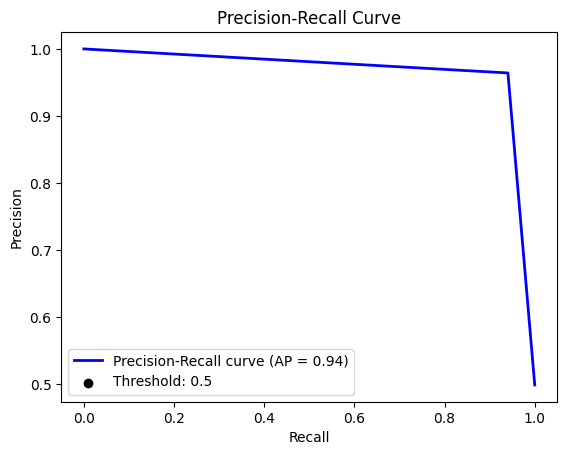

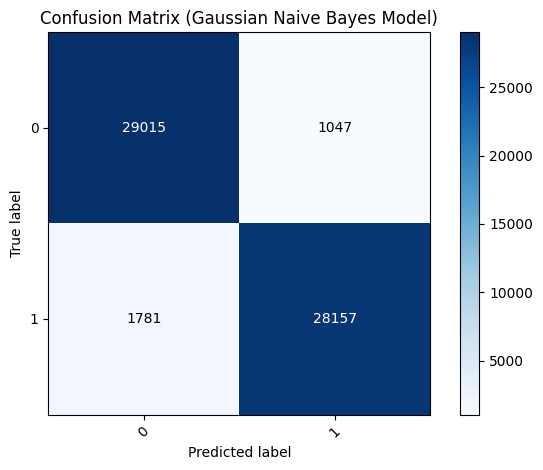

Threshold: 0.1
Accuracy: 0.9528833333333333
Confusion Matrix:
 [[29016  1046]
 [ 1781 28157]]
Precision: 0.9641817621477246
Recall: 0.94051038813548
False Positive Rate: 0.03479475750116426
False Negative Rate: 0.05948961186452001


<ipython-input-11-26d7ffa608ad>:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


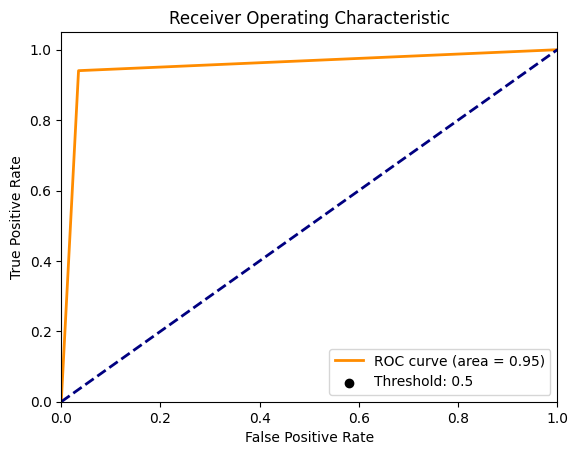

<ipython-input-11-26d7ffa608ad>:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


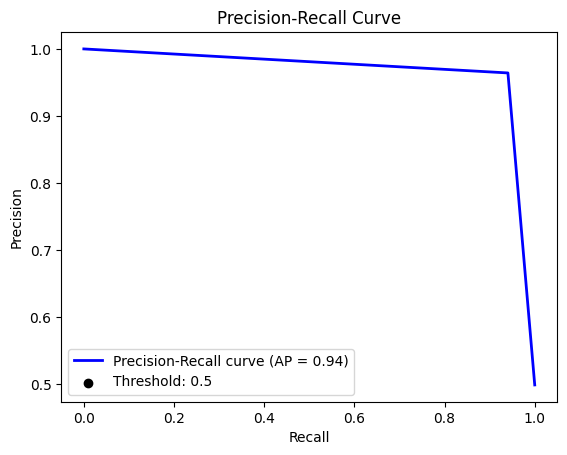

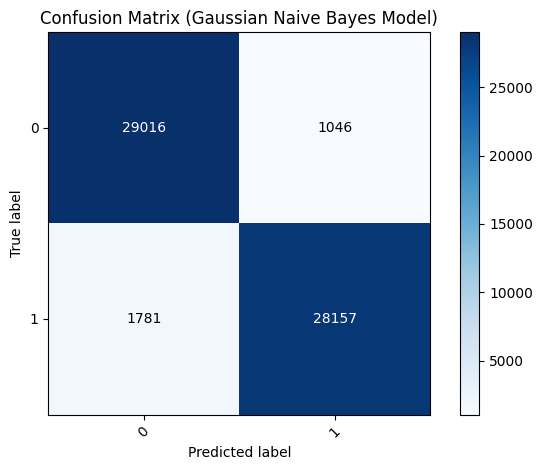

Threshold: 0.15
Accuracy: 0.9529
Confusion Matrix:
 [[29017  1045]
 [ 1781 28157]]
Precision: 0.9642147798096021
Recall: 0.94051038813548
False Positive Rate: 0.03476149291464307
False Negative Rate: 0.05948961186452001


<ipython-input-11-26d7ffa608ad>:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


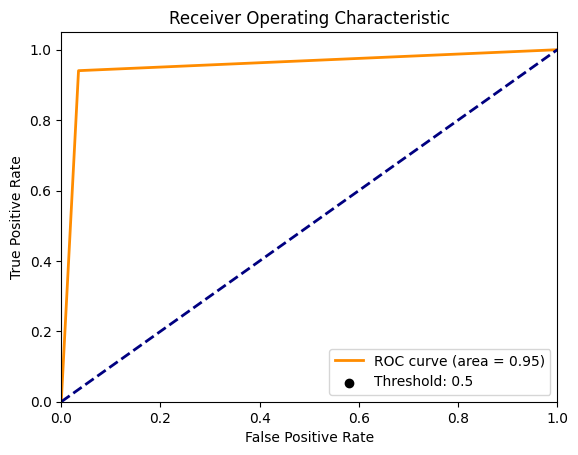

<ipython-input-11-26d7ffa608ad>:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


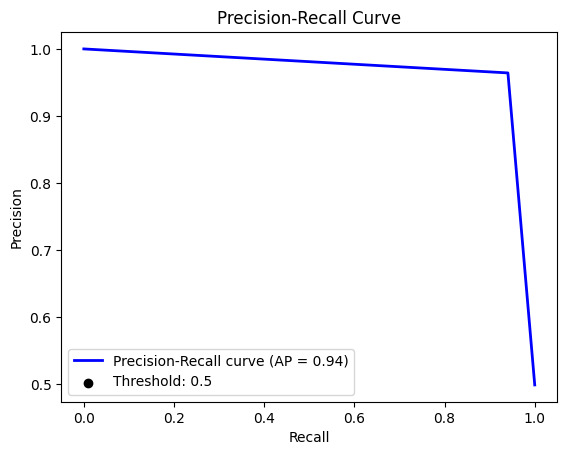

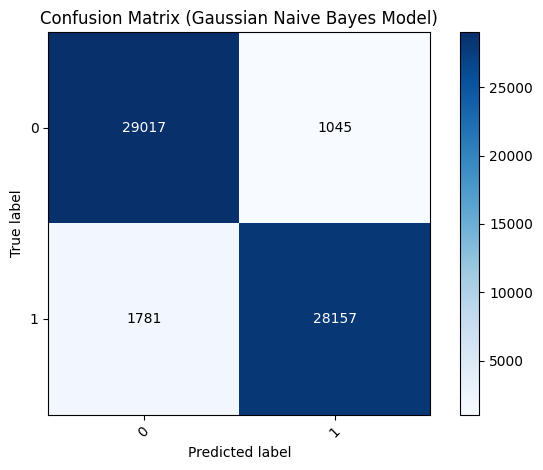

Threshold: 0.2
Accuracy: 0.9529166666666666
Confusion Matrix:
 [[29018  1044]
 [ 1781 28157]]
Precision: 0.9642477997328859
Recall: 0.94051038813548
False Positive Rate: 0.034728228328121884
False Negative Rate: 0.05948961186452001


<ipython-input-11-26d7ffa608ad>:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


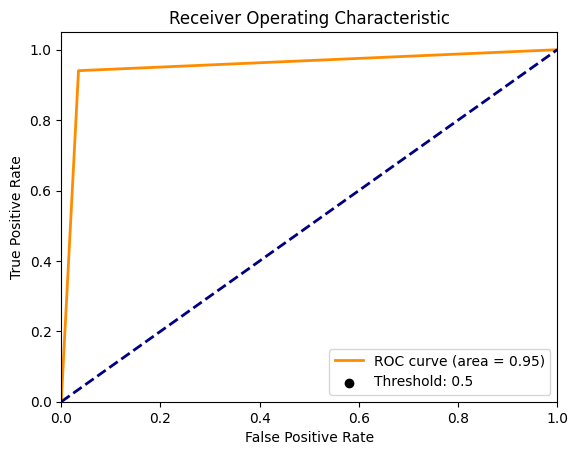

<ipython-input-11-26d7ffa608ad>:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


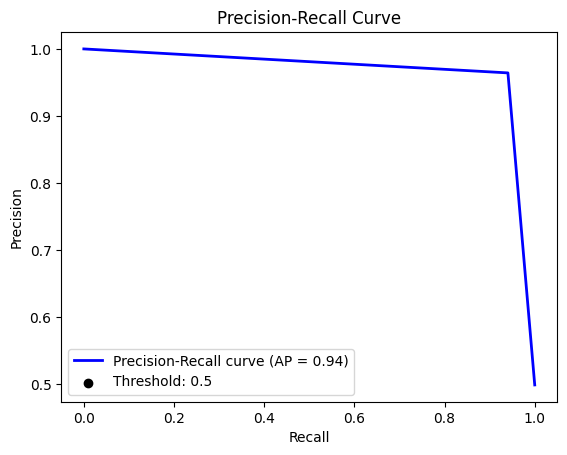

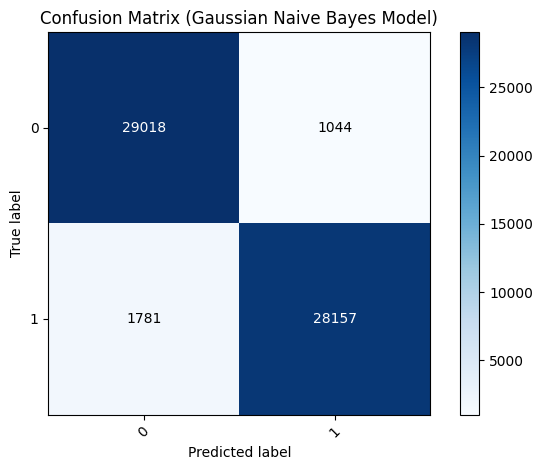

Threshold: 0.25
Accuracy: 0.9529166666666666
Confusion Matrix:
 [[29019  1043]
 [ 1782 28156]]
Precision: 0.964279598616391
Recall: 0.9404769857705926
False Positive Rate: 0.03469496374160069
False Negative Rate: 0.059523014229407444


<ipython-input-11-26d7ffa608ad>:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


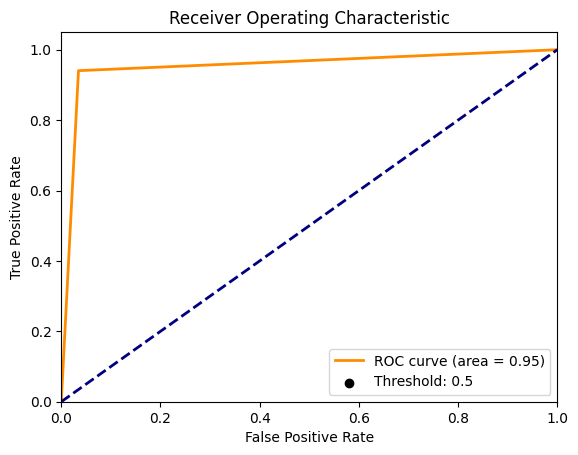

<ipython-input-11-26d7ffa608ad>:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


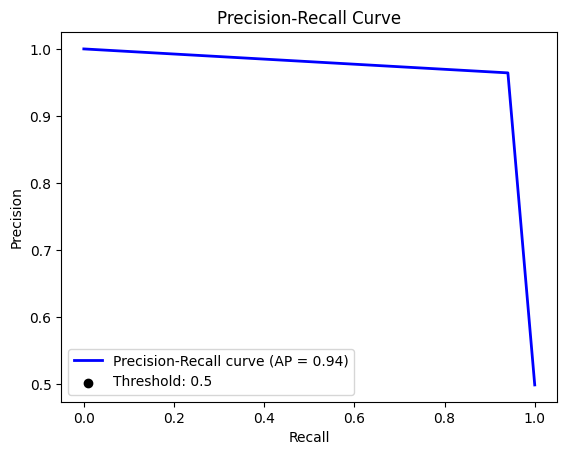

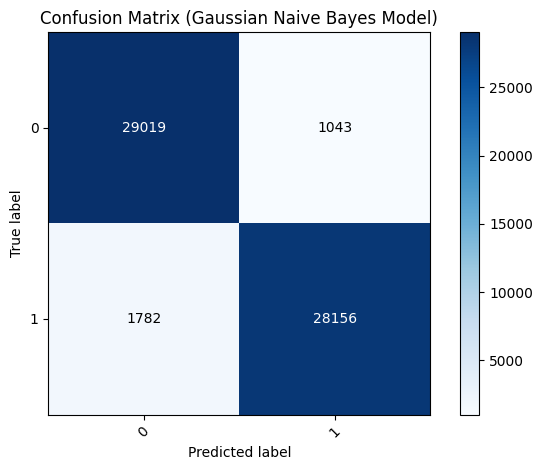

Threshold: 0.3
Accuracy: 0.95295
Confusion Matrix:
 [[29021  1041]
 [ 1782 28156]]
Precision: 0.9643456519505429
Recall: 0.9404769857705926
False Positive Rate: 0.03462843456855831
False Negative Rate: 0.059523014229407444


<ipython-input-11-26d7ffa608ad>:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


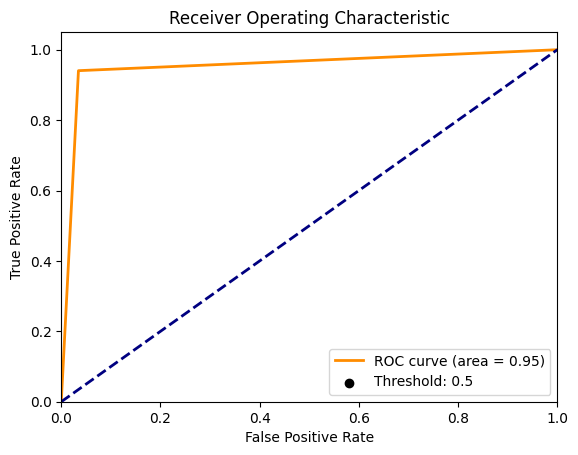

<ipython-input-11-26d7ffa608ad>:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


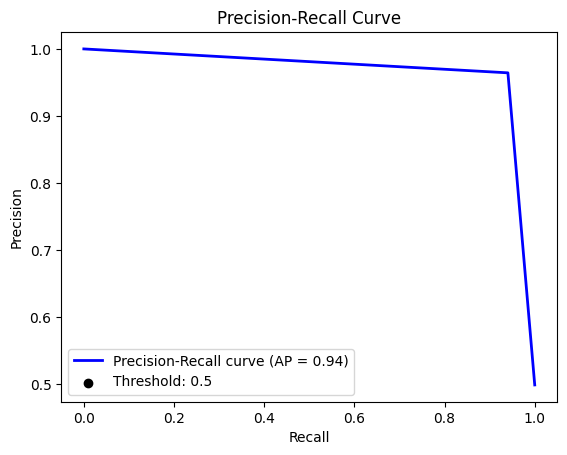

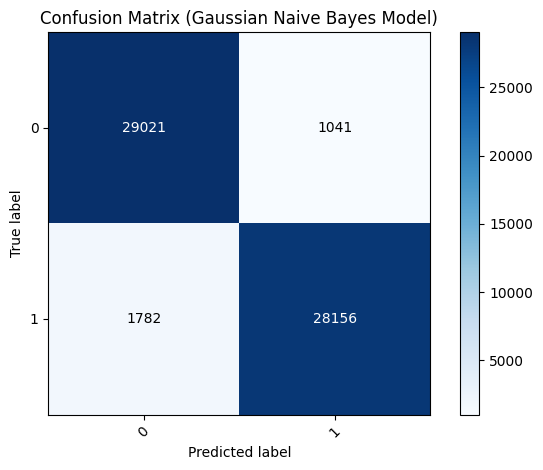

Threshold: 0.35
Accuracy: 0.95295
Confusion Matrix:
 [[29021  1041]
 [ 1782 28156]]
Precision: 0.9643456519505429
Recall: 0.9404769857705926
False Positive Rate: 0.03462843456855831
False Negative Rate: 0.059523014229407444


<ipython-input-11-26d7ffa608ad>:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


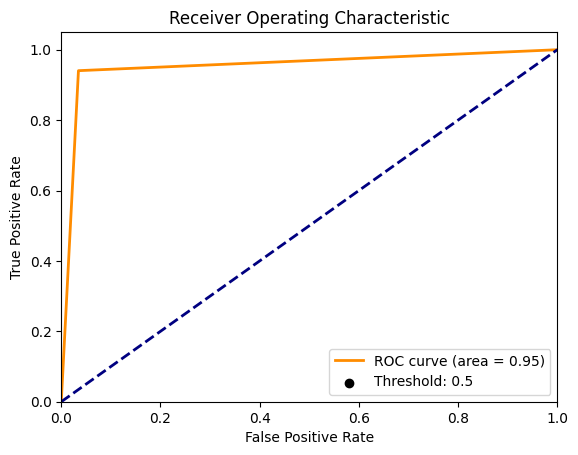

<ipython-input-11-26d7ffa608ad>:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


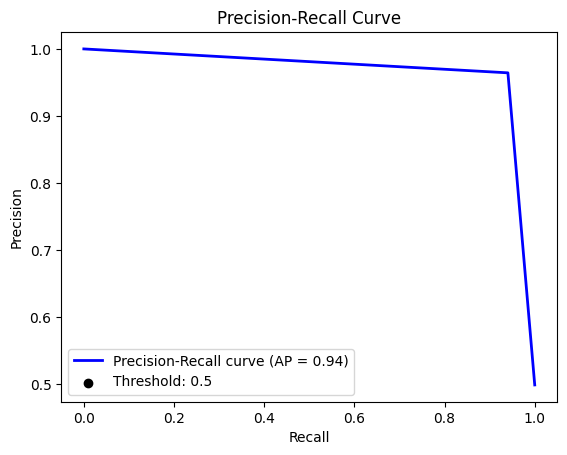

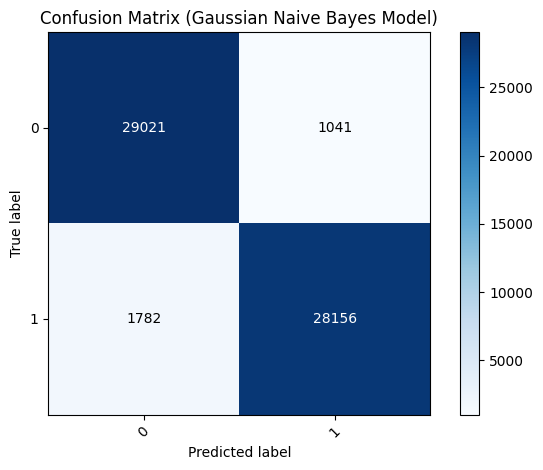

Threshold: 0.4
Accuracy: 0.95295
Confusion Matrix:
 [[29021  1041]
 [ 1782 28156]]
Precision: 0.9643456519505429
Recall: 0.9404769857705926
False Positive Rate: 0.03462843456855831
False Negative Rate: 0.059523014229407444


<ipython-input-11-26d7ffa608ad>:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


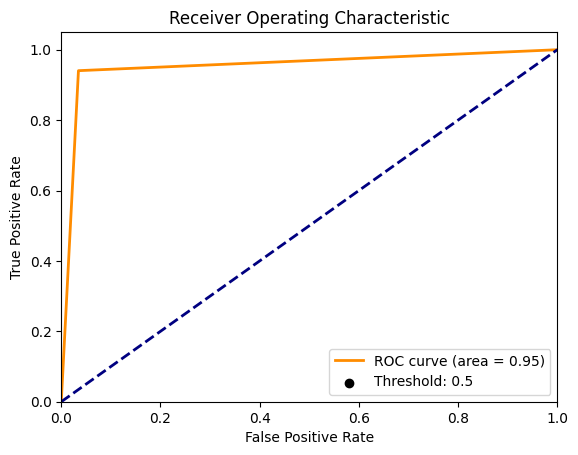

<ipython-input-11-26d7ffa608ad>:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


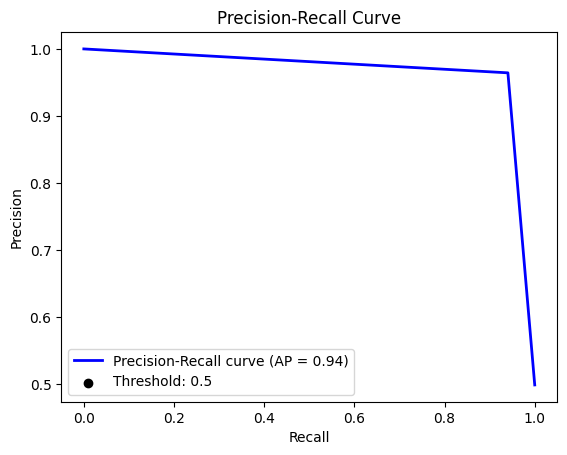

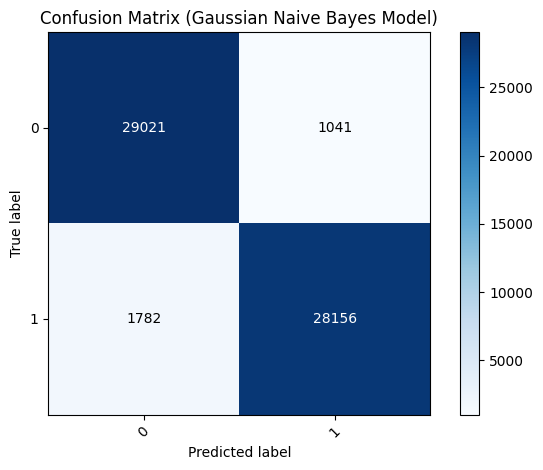

Threshold: 0.45
Accuracy: 0.95295
Confusion Matrix:
 [[29021  1041]
 [ 1782 28156]]
Precision: 0.9643456519505429
Recall: 0.9404769857705926
False Positive Rate: 0.03462843456855831
False Negative Rate: 0.059523014229407444


<ipython-input-11-26d7ffa608ad>:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


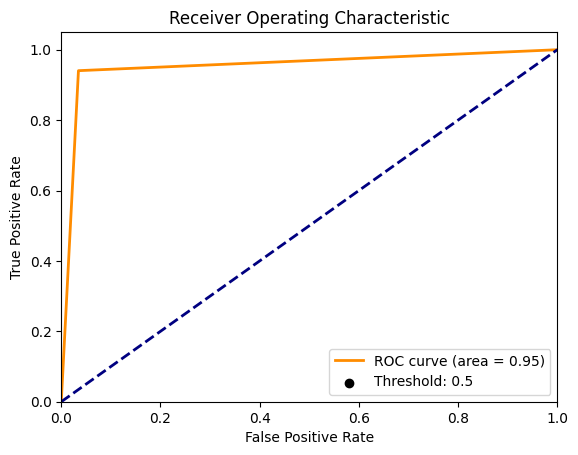

<ipython-input-11-26d7ffa608ad>:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


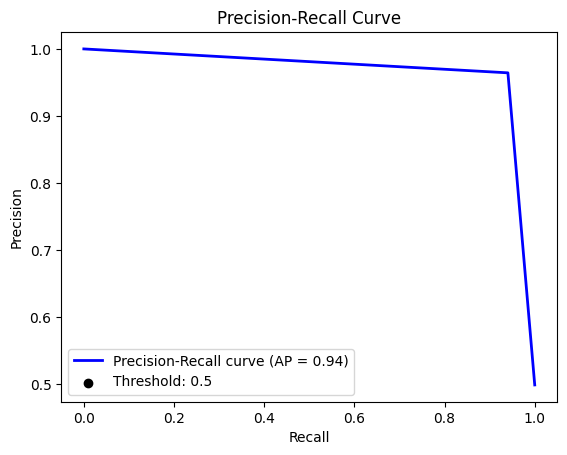

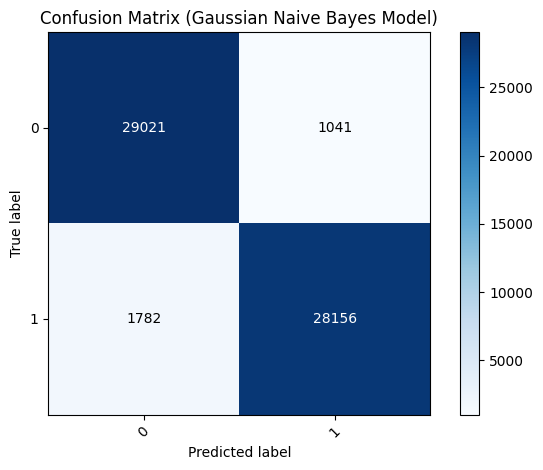

Threshold: 0.5
Accuracy: 0.95295
Confusion Matrix:
 [[29021  1041]
 [ 1782 28156]]
Precision: 0.9643456519505429
Recall: 0.9404769857705926
False Positive Rate: 0.03462843456855831
False Negative Rate: 0.059523014229407444


<ipython-input-11-26d7ffa608ad>:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


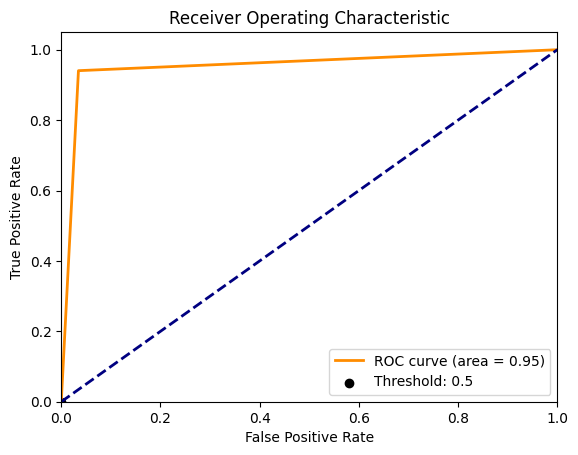

<ipython-input-11-26d7ffa608ad>:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


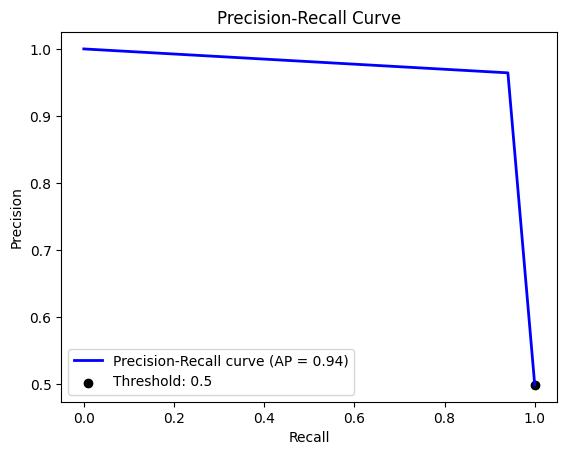

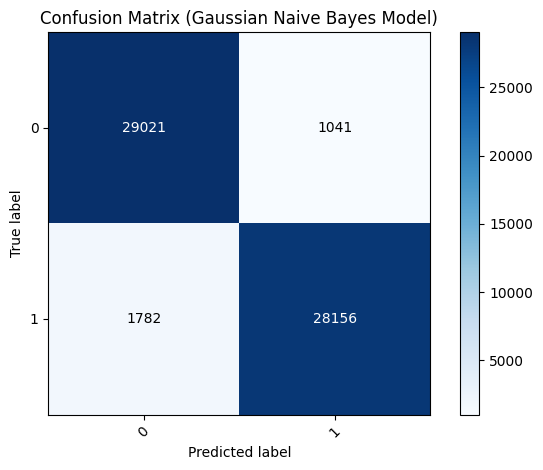

Threshold: 0.55
Accuracy: 0.95295
Confusion Matrix:
 [[29021  1041]
 [ 1782 28156]]
Precision: 0.9643456519505429
Recall: 0.9404769857705926
False Positive Rate: 0.03462843456855831
False Negative Rate: 0.059523014229407444


<ipython-input-11-26d7ffa608ad>:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


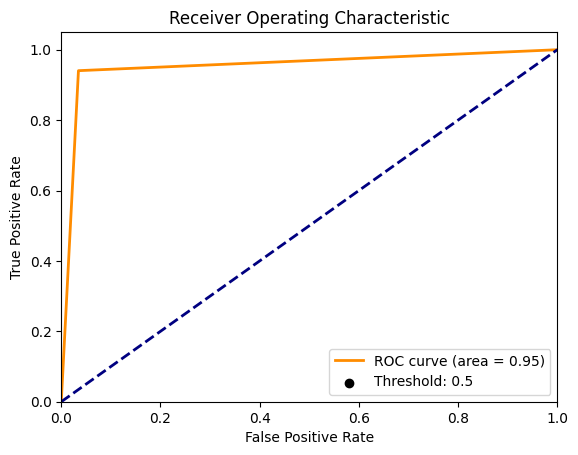

<ipython-input-11-26d7ffa608ad>:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


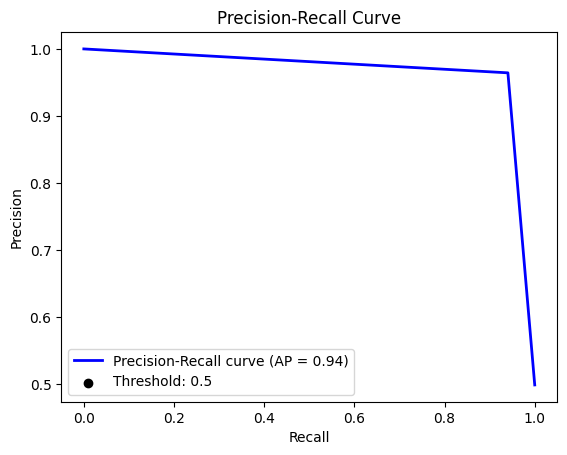

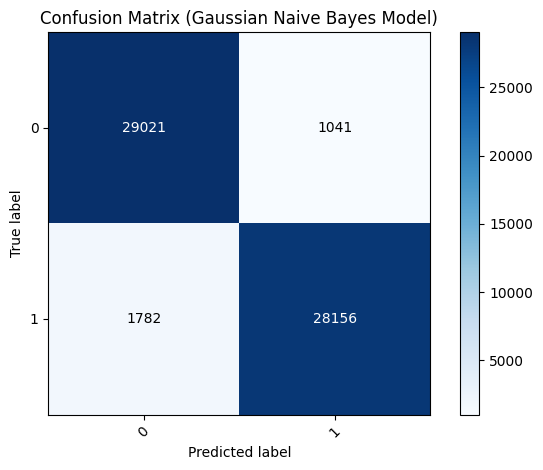

Threshold: 0.6
Accuracy: 0.9529333333333333
Confusion Matrix:
 [[29021  1041]
 [ 1783 28155]]
Precision: 0.9643444307439375
Recall: 0.9404435834057051
False Positive Rate: 0.03462843456855831
False Negative Rate: 0.05955641659429488


<ipython-input-11-26d7ffa608ad>:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


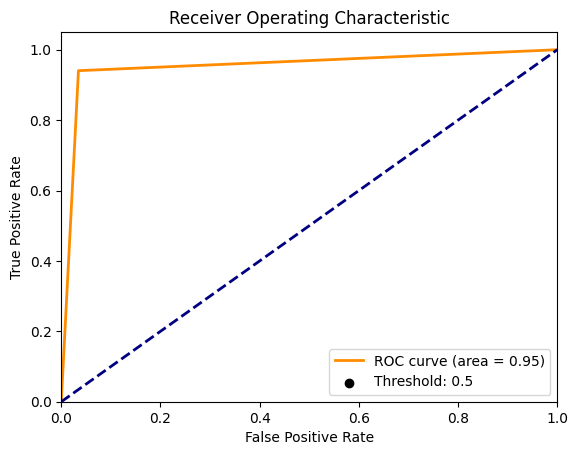

<ipython-input-11-26d7ffa608ad>:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


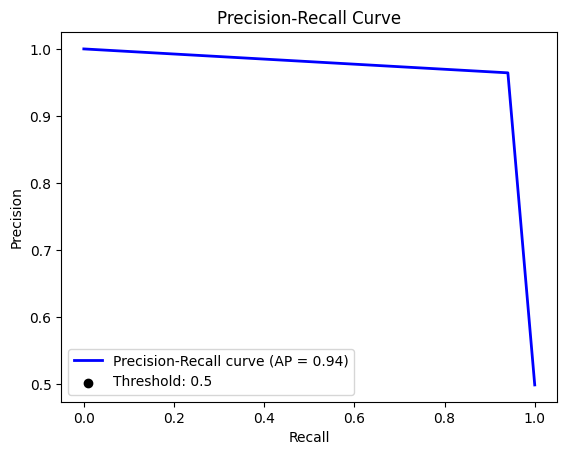

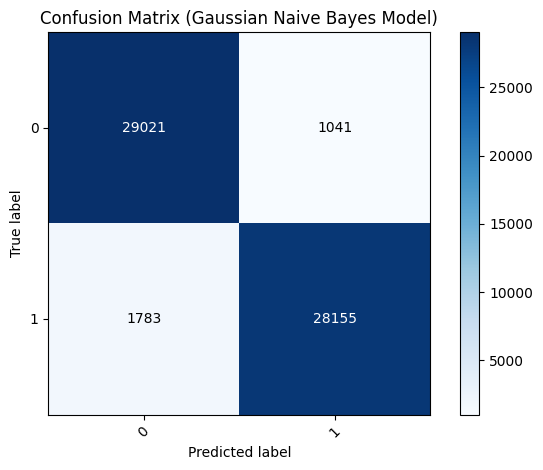

Threshold: 0.65
Accuracy: 0.9529166666666666
Confusion Matrix:
 [[29021  1041]
 [ 1784 28154]]
Precision: 0.9643432094536736
Recall: 0.9404101810408176
False Positive Rate: 0.03462843456855831
False Negative Rate: 0.05958981895918231


<ipython-input-11-26d7ffa608ad>:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


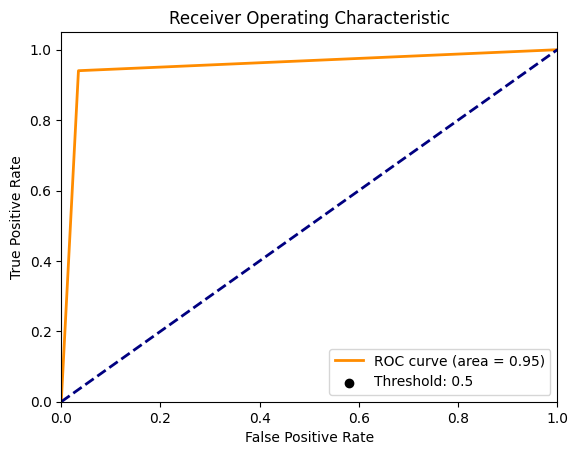

<ipython-input-11-26d7ffa608ad>:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


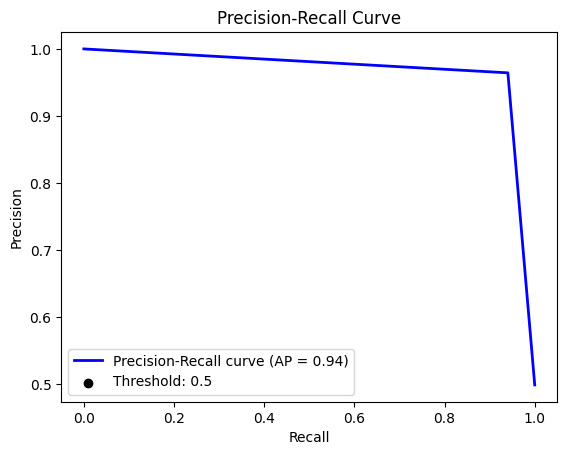

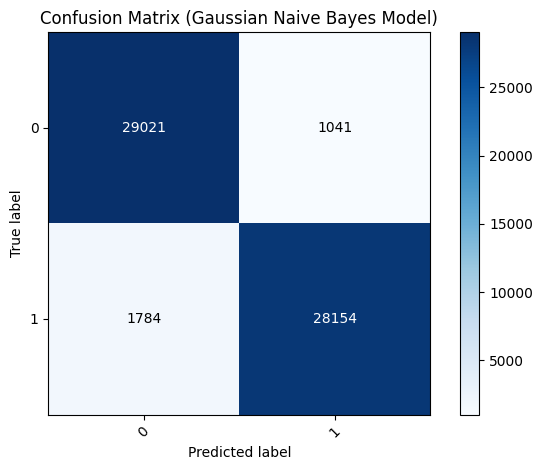

Threshold: 0.7
Accuracy: 0.9529166666666666
Confusion Matrix:
 [[29021  1041]
 [ 1784 28154]]
Precision: 0.9643432094536736
Recall: 0.9404101810408176
False Positive Rate: 0.03462843456855831
False Negative Rate: 0.05958981895918231


<ipython-input-11-26d7ffa608ad>:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


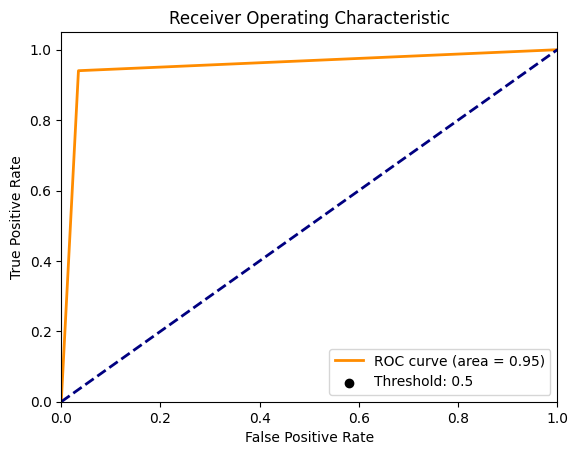

<ipython-input-11-26d7ffa608ad>:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


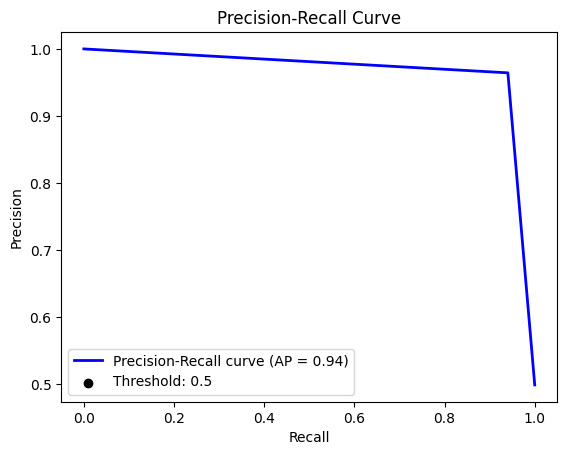

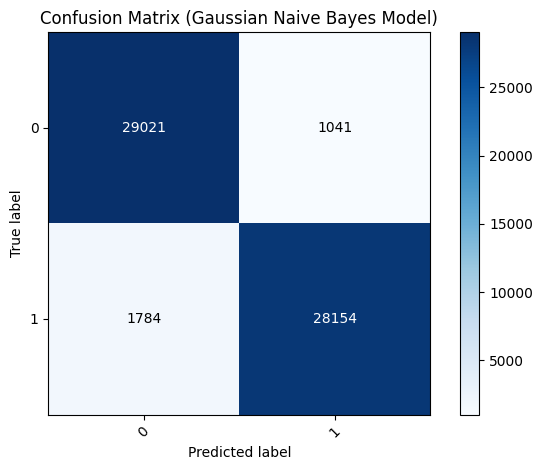

Threshold: 0.75
Accuracy: 0.9529166666666666
Confusion Matrix:
 [[29021  1041]
 [ 1784 28154]]
Precision: 0.9643432094536736
Recall: 0.9404101810408176
False Positive Rate: 0.03462843456855831
False Negative Rate: 0.05958981895918231


<ipython-input-11-26d7ffa608ad>:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


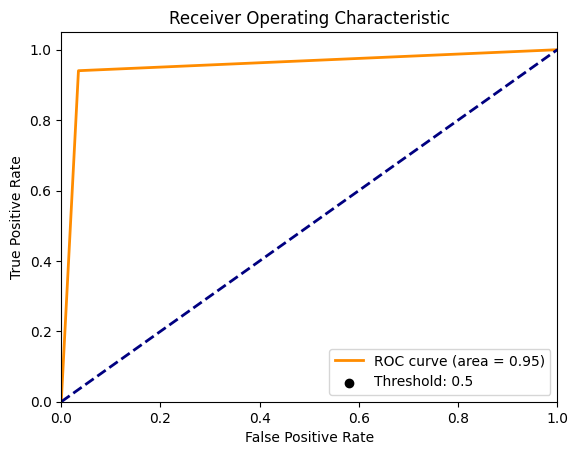

<ipython-input-11-26d7ffa608ad>:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


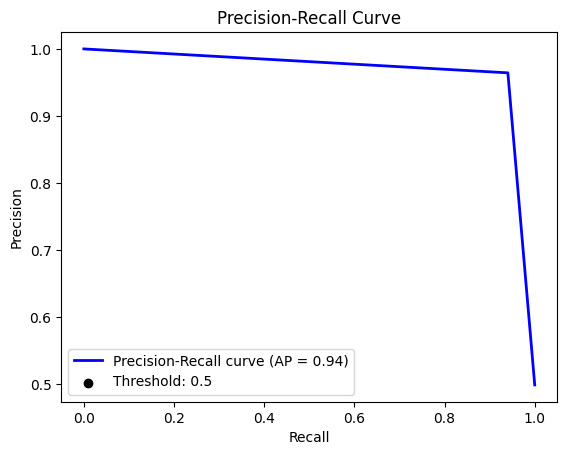

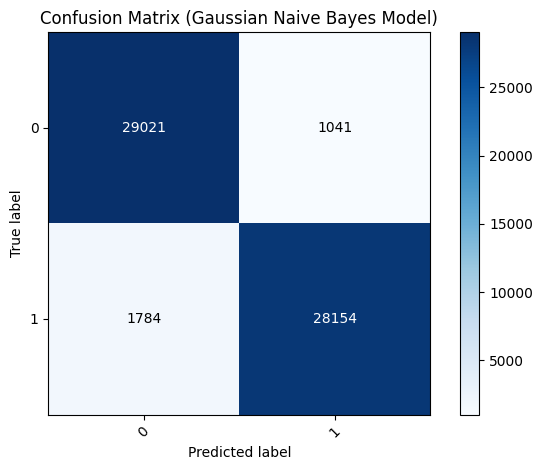

Threshold: 0.8
Accuracy: 0.9529166666666666
Confusion Matrix:
 [[29021  1041]
 [ 1784 28154]]
Precision: 0.9643432094536736
Recall: 0.9404101810408176
False Positive Rate: 0.03462843456855831
False Negative Rate: 0.05958981895918231


<ipython-input-11-26d7ffa608ad>:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


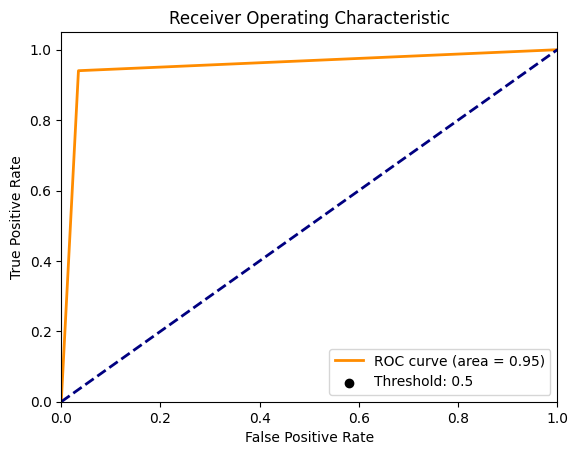

<ipython-input-11-26d7ffa608ad>:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


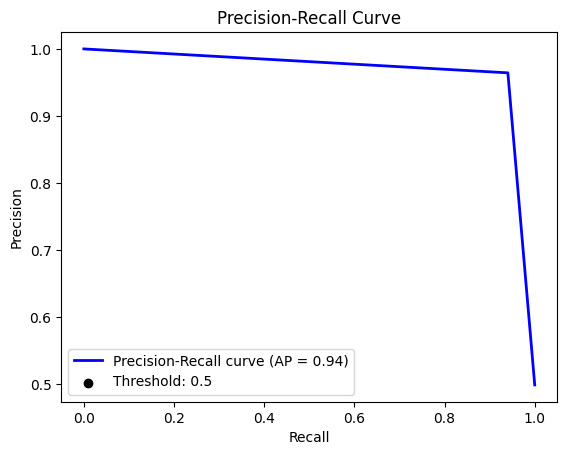

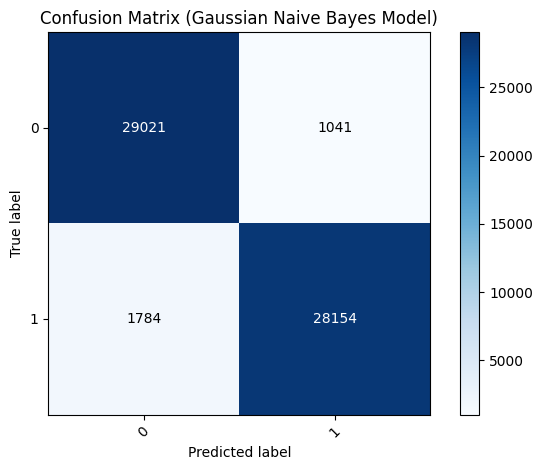

Threshold: 0.85
Accuracy: 0.9529166666666666
Confusion Matrix:
 [[29021  1041]
 [ 1784 28154]]
Precision: 0.9643432094536736
Recall: 0.9404101810408176
False Positive Rate: 0.03462843456855831
False Negative Rate: 0.05958981895918231


<ipython-input-11-26d7ffa608ad>:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


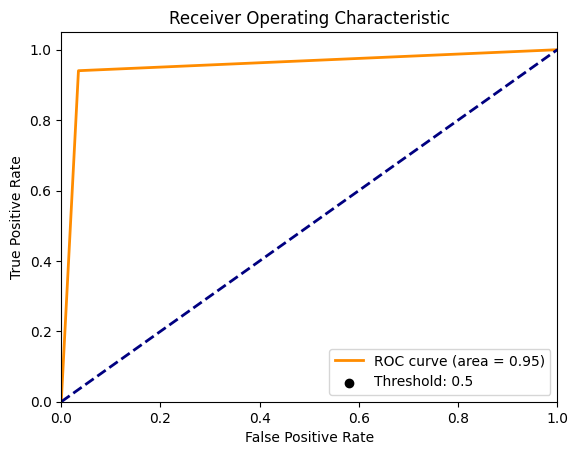

<ipython-input-11-26d7ffa608ad>:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


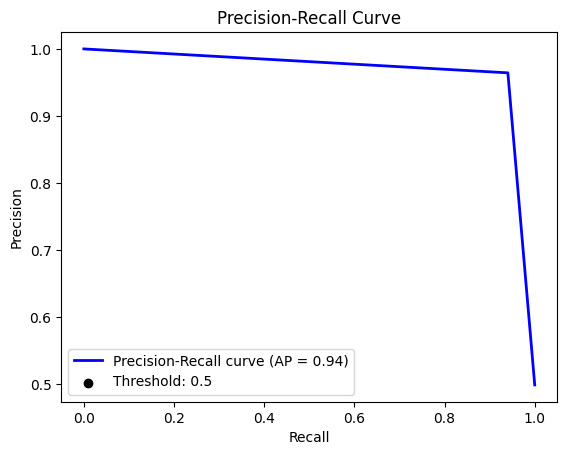

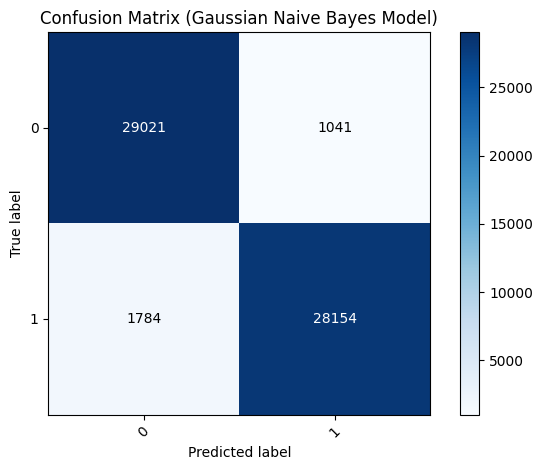

Threshold: 0.9
Accuracy: 0.9529166666666666
Confusion Matrix:
 [[29021  1041]
 [ 1784 28154]]
Precision: 0.9643432094536736
Recall: 0.9404101810408176
False Positive Rate: 0.03462843456855831
False Negative Rate: 0.05958981895918231


<ipython-input-11-26d7ffa608ad>:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


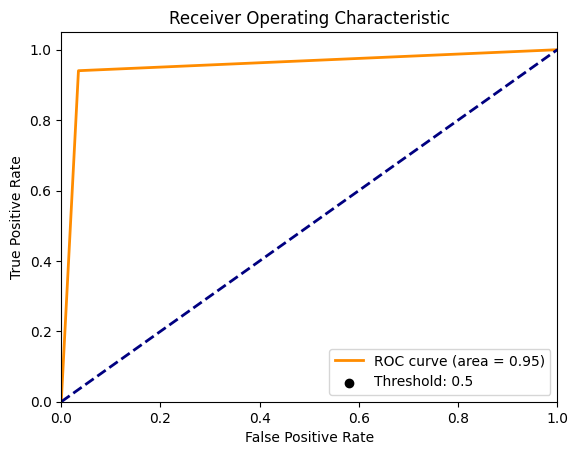

<ipython-input-11-26d7ffa608ad>:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


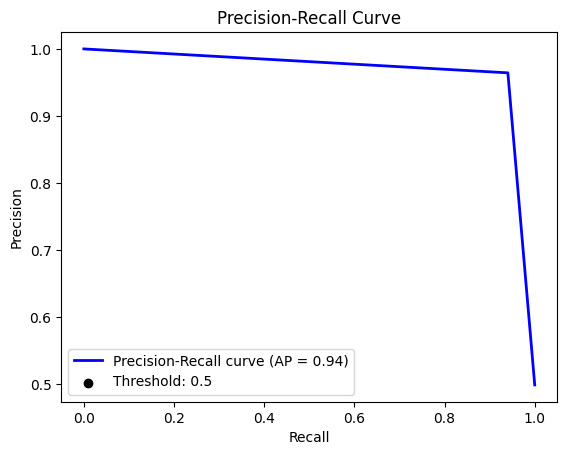

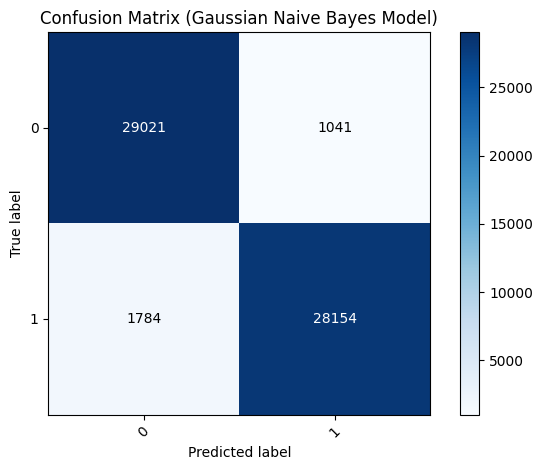

Threshold: 0.95
Accuracy: 0.9529166666666666
Confusion Matrix:
 [[29021  1041]
 [ 1784 28154]]
Precision: 0.9643432094536736
Recall: 0.9404101810408176
False Positive Rate: 0.03462843456855831
False Negative Rate: 0.05958981895918231


<ipython-input-11-26d7ffa608ad>:42: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(fpr[np.where(threshold == 0.5)], tpr[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


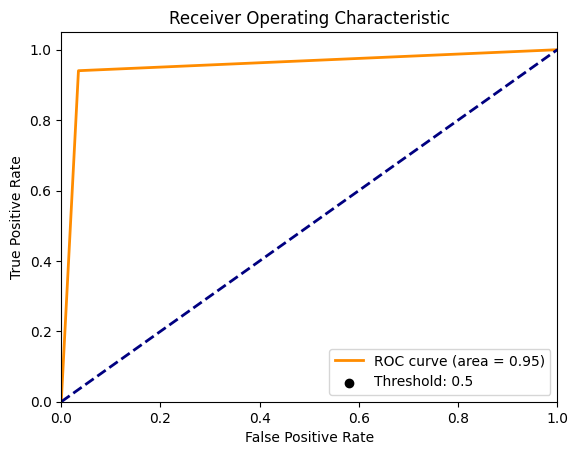

<ipython-input-11-26d7ffa608ad>:59: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  plt.scatter(recall[np.where(threshold == 0.5)], precision[np.where(threshold == 0.5)], marker='o', color='black', label='Threshold: 0.5')


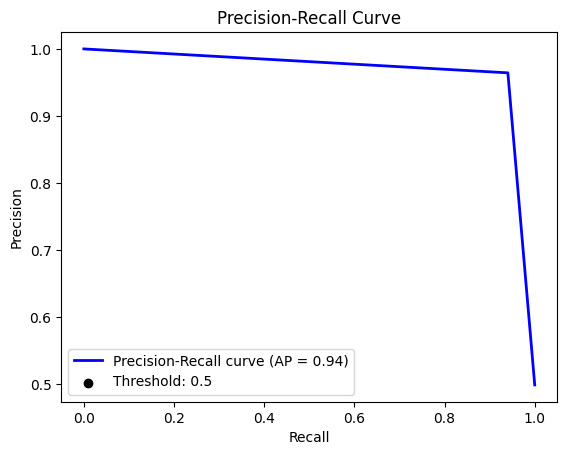

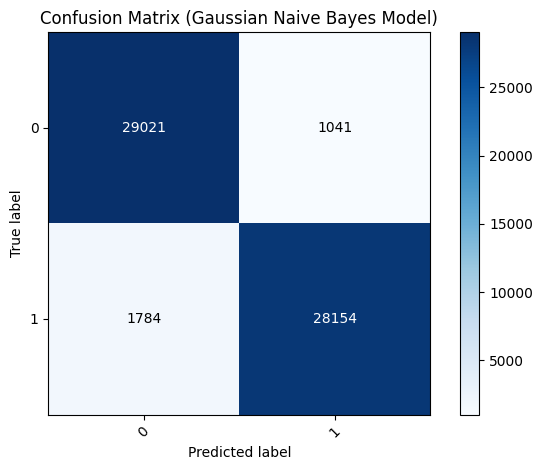

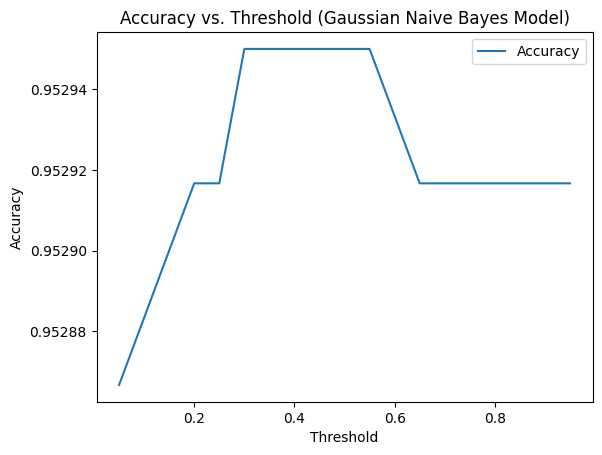

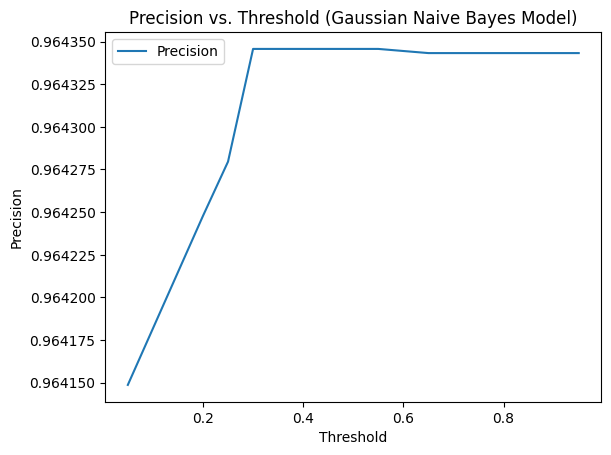

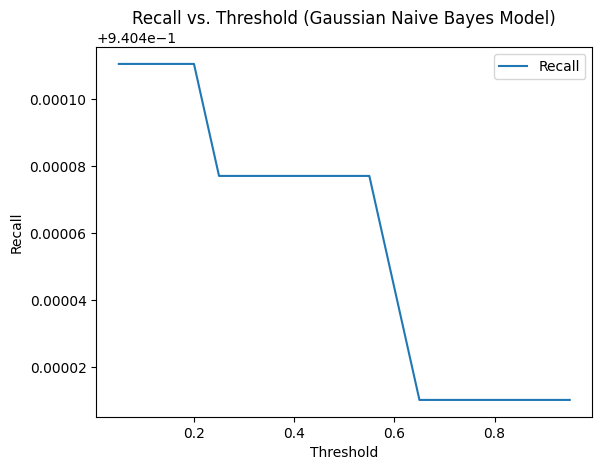

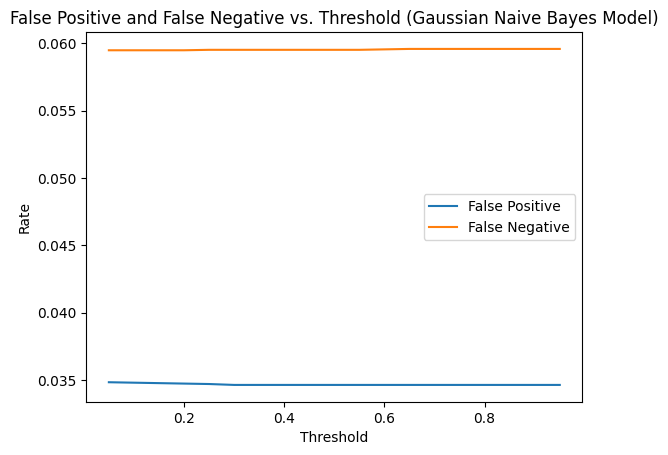

Maximum Accuracy: 0.95295
Best Threshold: 0.3


In [ ]:
# Predictions and Evaluation
print('Making predictions with the Gaussian Naive Bayes model...')

# Initialize lists to store evaluation metrics
accuracy_list = []
precision_list = []
recall_list = []
false_positive_list = []
false_negative_list = []

# Define the thresholds to test
thresholds = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

max_accuracy = 0.0
best_threshold = 0.0

for threshold in thresholds:
    print('Threshold:', threshold)
    y_pred = (gnb_model.predict_proba(X_test)[:, 1] >= threshold).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    false_positive = confusion[0, 1] / (confusion[0, 1] + confusion[0, 0])
    false_negative = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])

    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion)
    print("Precision:", precision)
    print("Recall:", recall)
    print("False Positive Rate:", false_positive)
    print("False Negative Rate:", false_negative)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    false_positive_list.append(false_positive)
    false_negative_list.append(false_negative)

    # Plot all the evaluation metrics
    plot_roc_curve_threshold(y_test, y_pred, threshold)
    plot_precision_recall_curve_threshold(y_test, y_pred, threshold)
    plot_confusion_matrix(y_test, y_pred, classes=np.array([0, 1]), title='Confusion Matrix (Gaussian Naive Bayes Model)')

    # Update max accuracy and best threshold if current accuracy is higher
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_threshold = threshold

# Plotting accuracy vs. threshold
plt.plot(thresholds, accuracy_list, label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold (Gaussian Naive Bayes Model)')
plt.legend()
plt.show()

# Plotting precision vs. threshold
plt.plot(thresholds, precision_list, label='Precision')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision vs. Threshold (Gaussian Naive Bayes Model)')
plt.legend()
plt.show()

# Plotting recall vs. threshold
plt.plot(thresholds, recall_list, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall vs. Threshold (Gaussian Naive Bayes Model)')
plt.legend()
plt.show()

# Plotting false positive and false negative rates vs. threshold
plt.plot(thresholds, false_positive_list, label='False Positive')
plt.plot(thresholds, false_negative_list, label='False Negative')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('False Positive and False Negative vs. Threshold (Gaussian Naive Bayes Model)')
plt.legend()
plt.show()

# Display maximum accuracy and best threshold
print('Maximum Accuracy:', max_accuracy)
print('Best Threshold:', best_threshold)

### Random Forest model
Next, we will use the random forest model to classify the URLs and evaluate the model using the test set. The model will use 100 estimators (trees).

In [ ]:
# Model Training with RandomForestClassifier
print('Training the Random Forest model with 100 estimators and a random state of 42...')
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
print('Random Forest model training complete.')

# Save the model to disk
print('Saving the Random Forest model to disk...')
with open('random_forest_model.pkl', 'wb') as f:
    pkl.dump(rf_model, f)

print('Random Forest model saved to disk.')

Training the Random Forest model with 100 estimators and a random state of 42...
Random Forest model training complete.
Saving the Random Forest model to disk...
Random Forest model saved to disk.


#### Functions for graphs

In [ ]:
# ROC Curve
def plot_roc_curve(model, X_test, y_test, threshold=0.5):
    fpr, tpr, _ = roc_curve(y_test, (model.predict_proba(X_test)[:, 1] >= threshold).astype(int))
    plt.plot(fpr, tpr, label='ROC Curve')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Random Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()

# Precision-Recall Curve
def plot_precision_recall_curve(model, X_test, y_test, threshold=0.5):
    precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    plt.plot(recall, precision, marker='.')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()

# Confusion Matrix Heatmap
def plot_confusion_matrix(model, X_test, y_test, threshold=0.5):
    cm = confusion_matrix(y_test, (model.predict_proba(X_test)[:, 1] >= threshold).astype(int))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    classes = ['Benign', 'Malicious']  # Class labels
    plt.xticks(ticks=[0, 1], labels=classes)
    plt.yticks(ticks=[0, 1], labels=classes)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    # Add text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], 'd'),
                     ha="center", va="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.show()

#### Testing different thresholds for the Random Forest model

Feature Importance Plot for the Random Forest model...


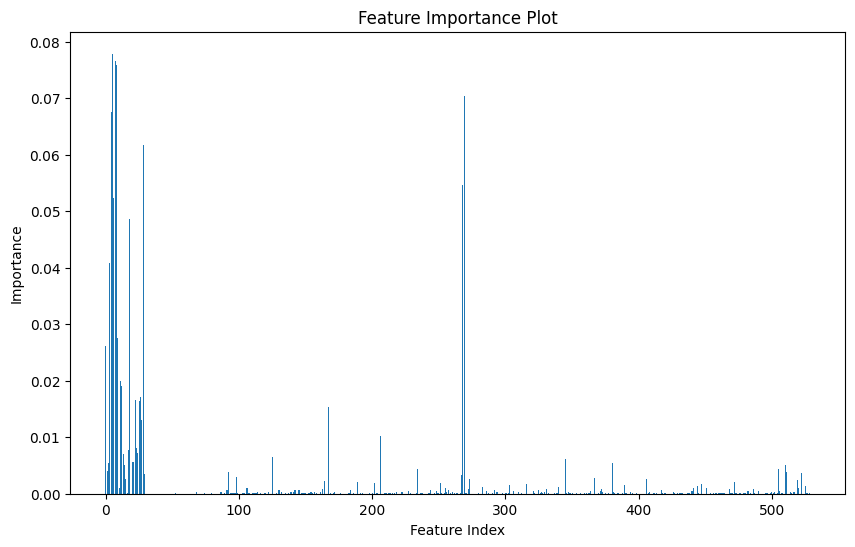

Making predictions with the Random Forest model...
Testing the Random Forest model with different thresholds...
Threshold: 0.05
Accuracy: 0.8938
Confusion Matrix:
 [[24015  6047]
 [  325 29613]]
Precision: 0.8304262478968032
Recall: 0.9891442314115839
False Positive Rate: 0.20115095469363317
False Negative Rate: 0.01085576858841606


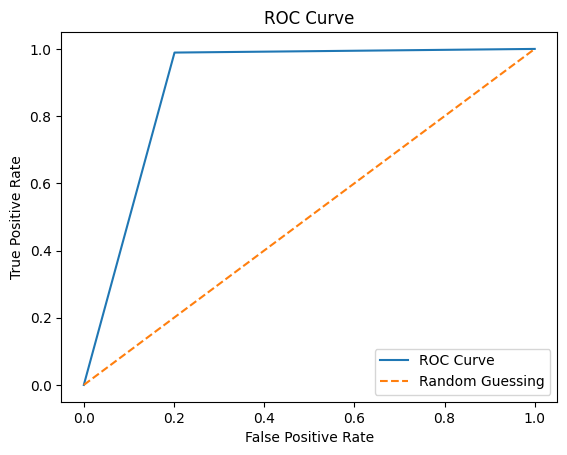

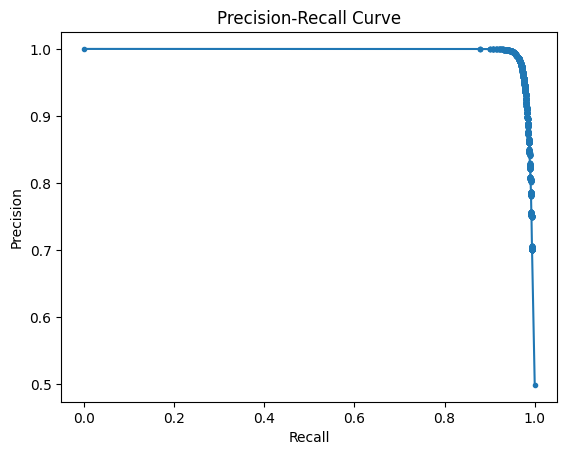

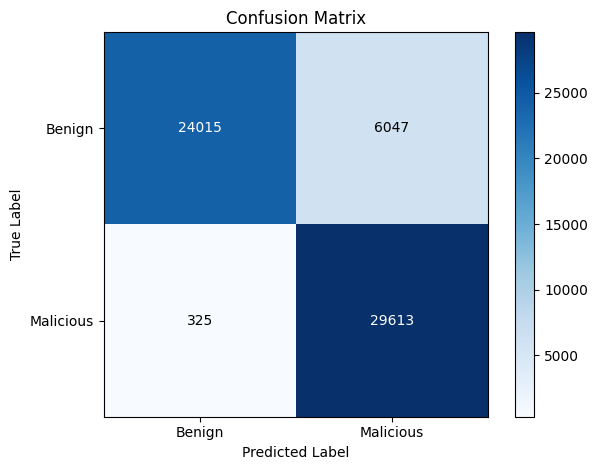

Threshold: 0.1
Accuracy: 0.9370166666666667
Confusion Matrix:
 [[26771  3291]
 [  488 29450]]
Precision: 0.8994838276167496
Recall: 0.9836996459349322
False Positive Rate: 0.10947375424123477
False Negative Rate: 0.01630035406506781


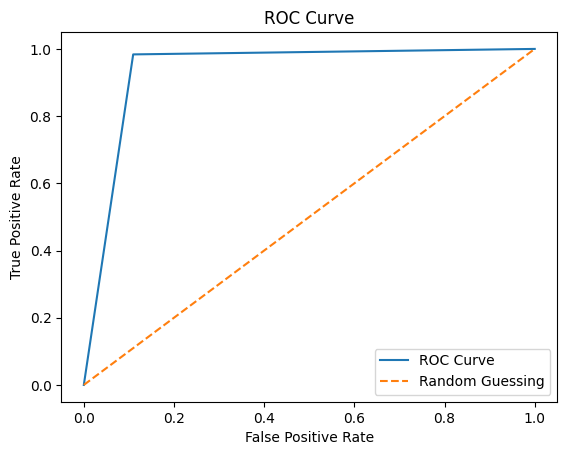

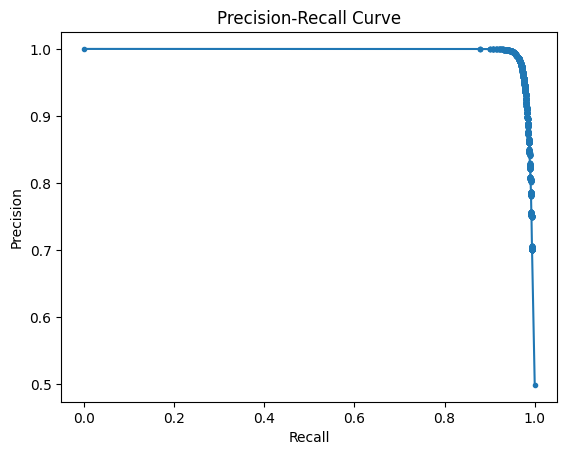

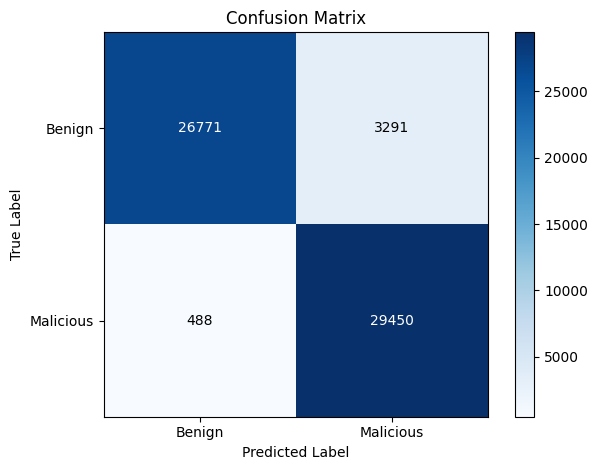

Threshold: 0.15
Accuracy: 0.9549333333333333
Confusion Matrix:
 [[27969  2093]
 [  611 29327]]
Precision: 0.9333863781031191
Recall: 0.9795911550537778
False Positive Rate: 0.06962277958884971
False Negative Rate: 0.020408844946222193


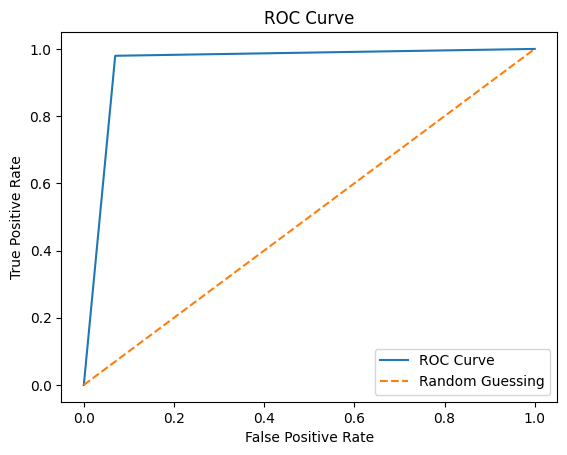

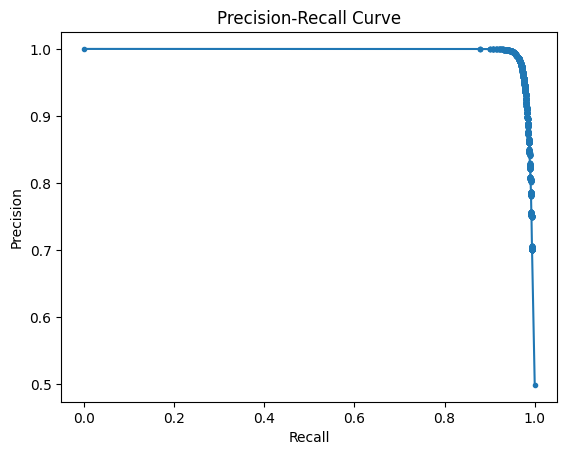

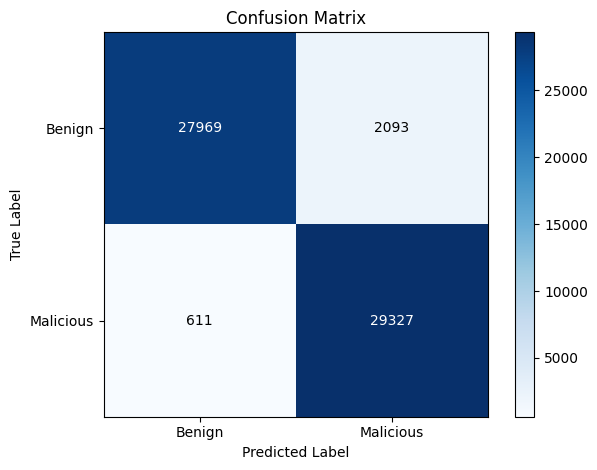

Threshold: 0.2
Accuracy: 0.9635833333333333
Confusion Matrix:
 [[28571  1491]
 [  694 29244]]
Precision: 0.9514885309907272
Recall: 0.9768187587681207
False Positive Rate: 0.049597498503093605
False Negative Rate: 0.023181241231879215


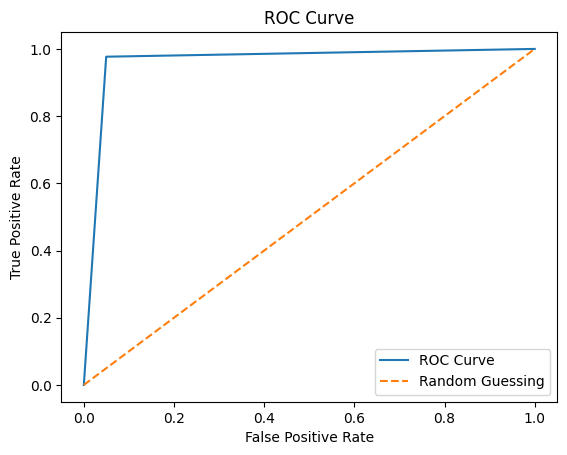

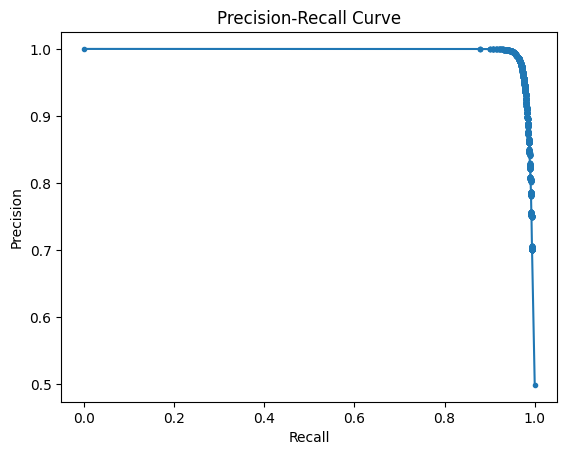

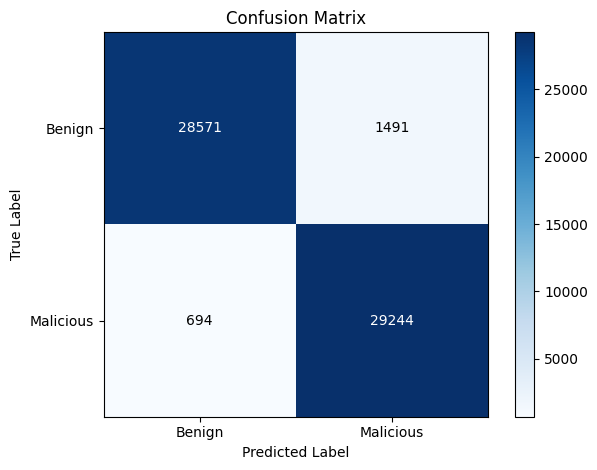

Threshold: 0.25
Accuracy: 0.9675
Confusion Matrix:
 [[28873  1189]
 [  761 29177]]
Precision: 0.9608443654086808
Recall: 0.9745808003206627
False Positive Rate: 0.03955159337369436
False Negative Rate: 0.025419199679337298


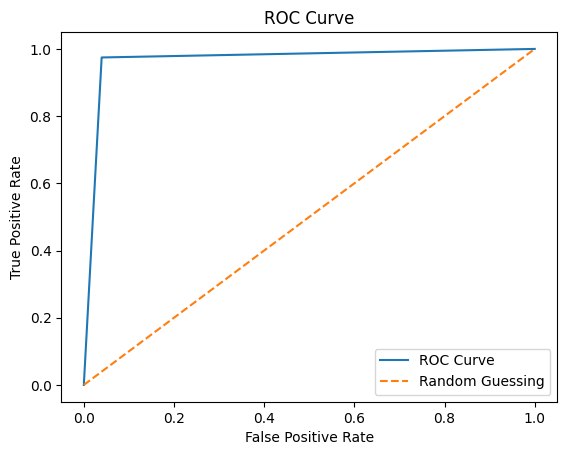

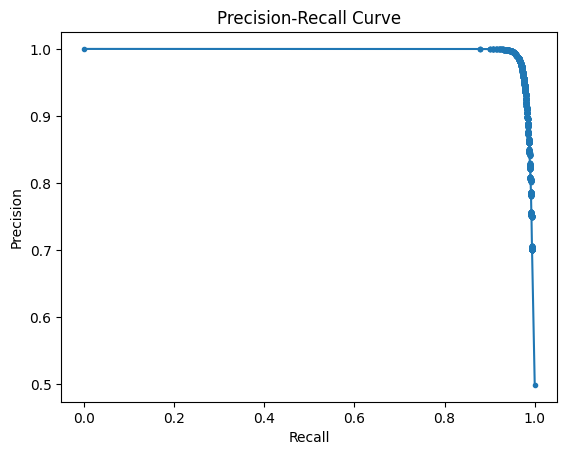

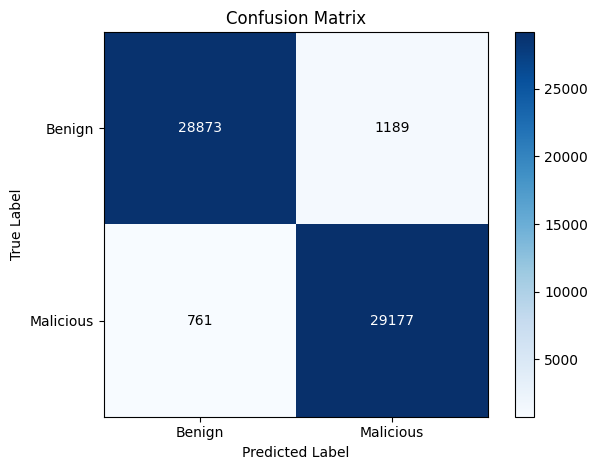

Threshold: 0.3
Accuracy: 0.9702333333333333
Confusion Matrix:
 [[29105   957]
 [  829 29109]]
Precision: 0.9681700259429256
Recall: 0.9723094395083172
False Positive Rate: 0.03183420930077839
False Negative Rate: 0.027690560491682812


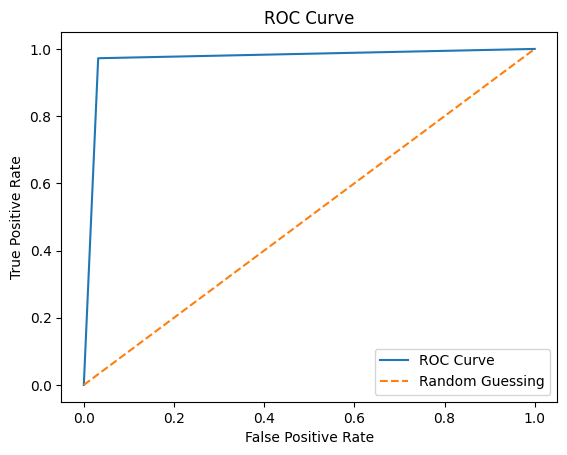

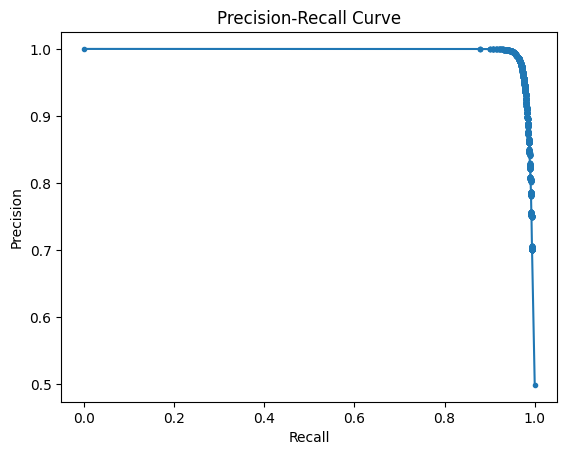

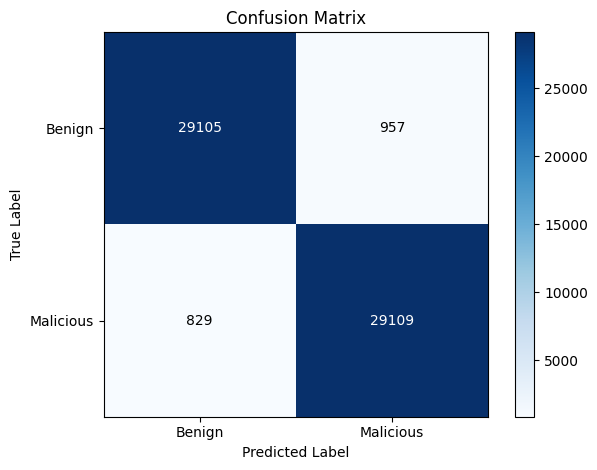

Threshold: 0.35
Accuracy: 0.97305
Confusion Matrix:
 [[29328   734]
 [  883 29055]]
Precision: 0.9753600322266609
Recall: 0.9705057118043957
False Positive Rate: 0.024416206506553125
False Negative Rate: 0.02949428819560425


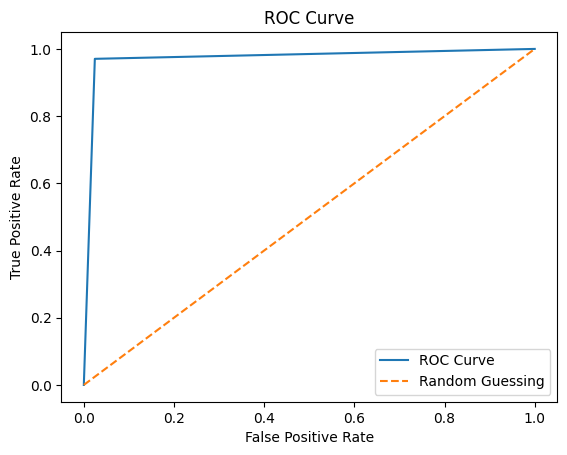

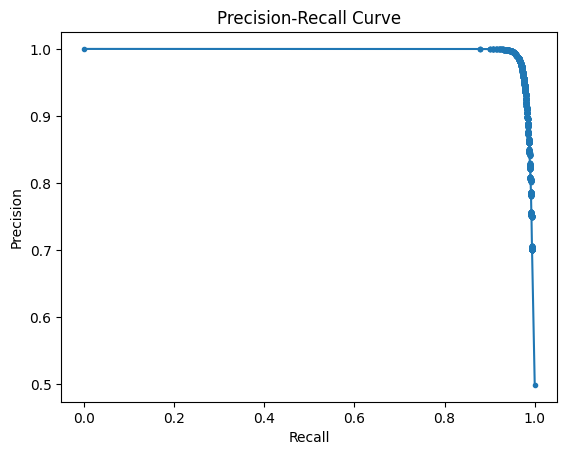

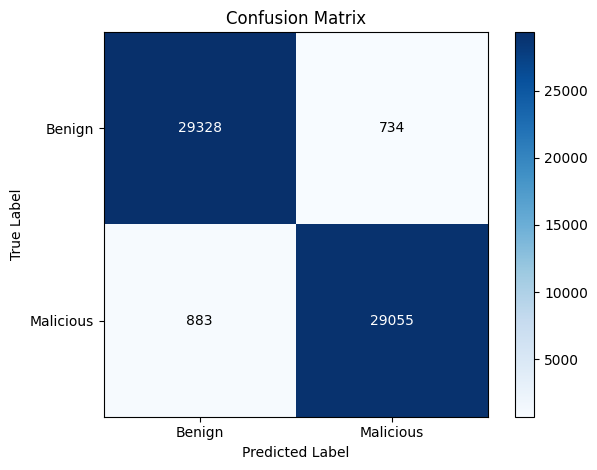

Threshold: 0.4
Accuracy: 0.9743333333333334
Confusion Matrix:
 [[29472   590]
 [  950 28988]]
Precision: 0.9800527419027656
Recall: 0.9682677533569377
False Positive Rate: 0.01962610604750183
False Negative Rate: 0.03173224664306233


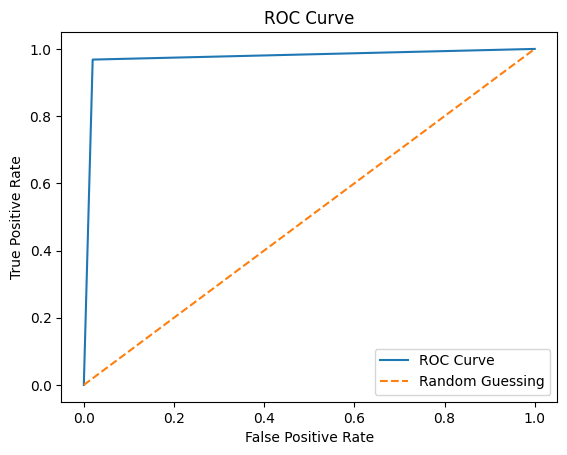

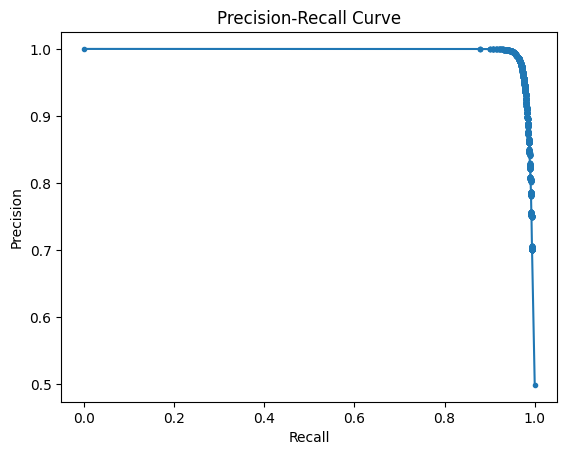

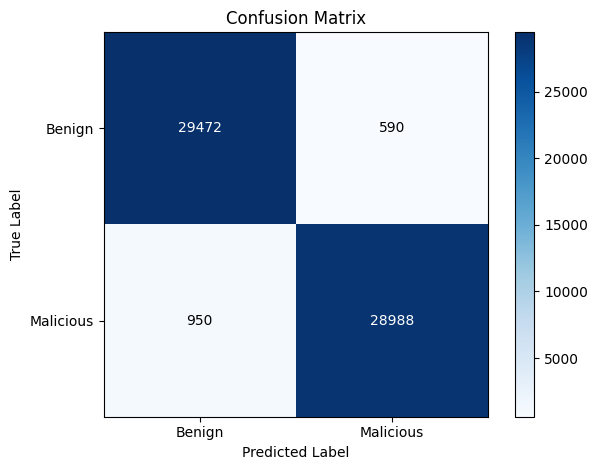

Threshold: 0.45
Accuracy: 0.9748666666666667
Confusion Matrix:
 [[29580   482]
 [ 1026 28912]]
Precision: 0.9836020956657822
Recall: 0.9657291736254927
False Positive Rate: 0.01603353070321336
False Negative Rate: 0.03427082637450732


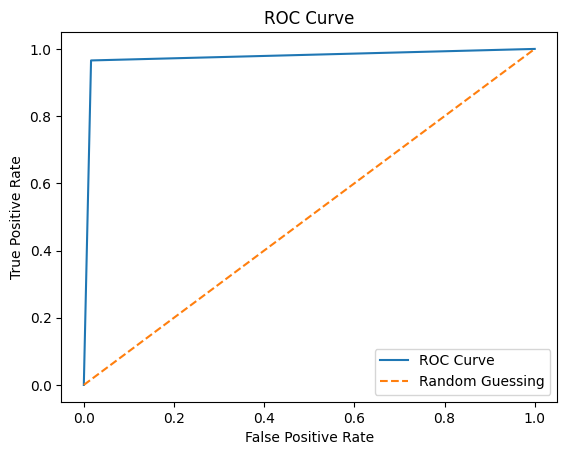

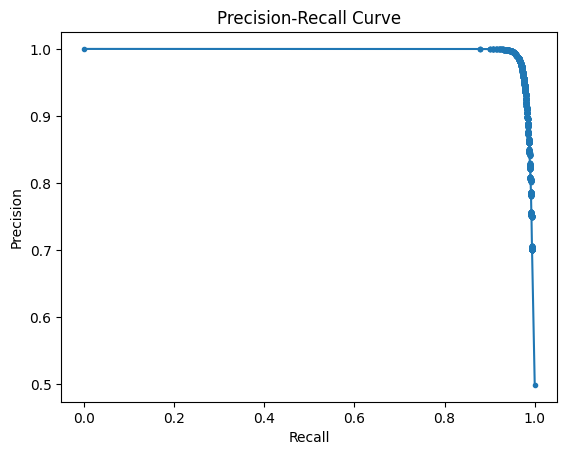

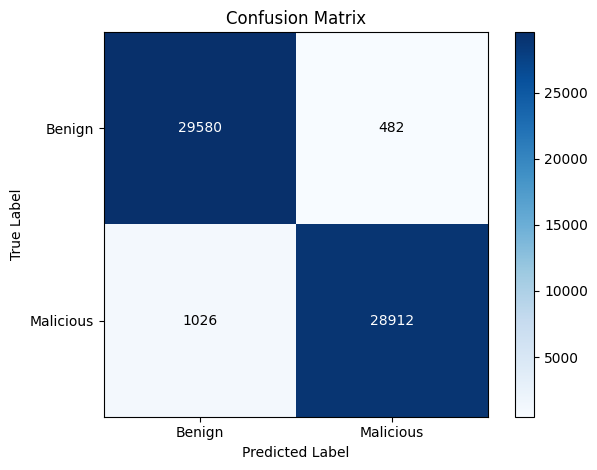

Threshold: 0.5
Accuracy: 0.97555
Confusion Matrix:
 [[29684   378]
 [ 1089 28849]]
Precision: 0.9870667533445102
Recall: 0.9636248246375844
False Positive Rate: 0.012574013705009646
False Negative Rate: 0.036375175362415656


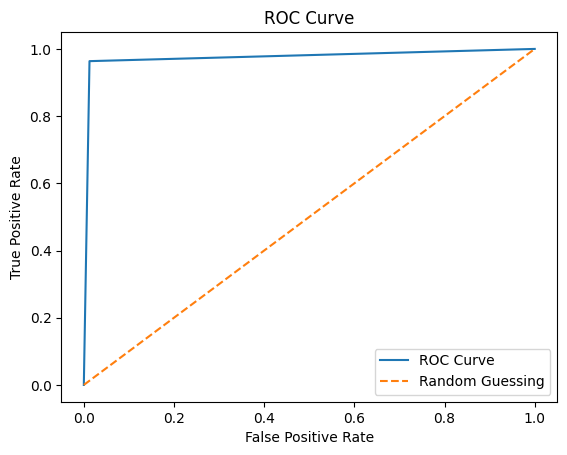

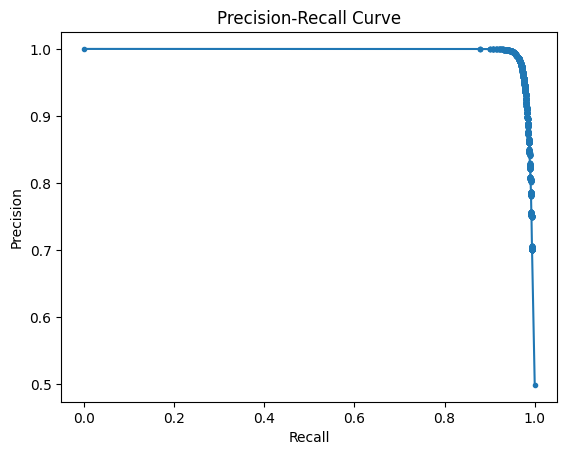

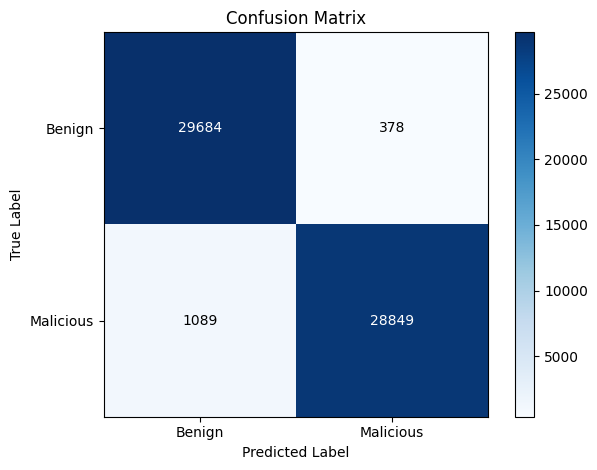

Threshold: 0.55
Accuracy: 0.9752166666666666
Confusion Matrix:
 [[29747   315]
 [ 1172 28766]]
Precision: 0.9891681854131563
Recall: 0.9608524283519273
False Positive Rate: 0.010478344754174706
False Negative Rate: 0.039147571648072685


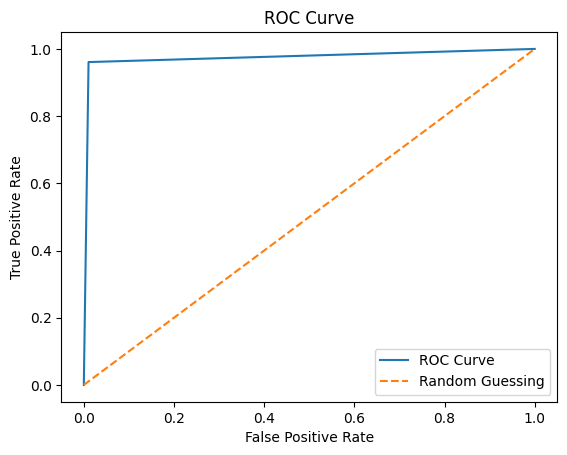

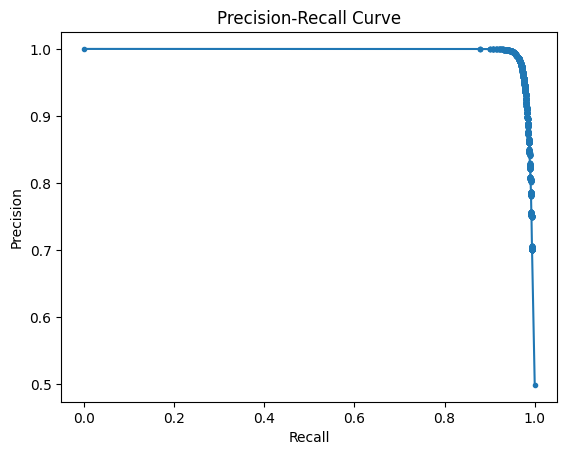

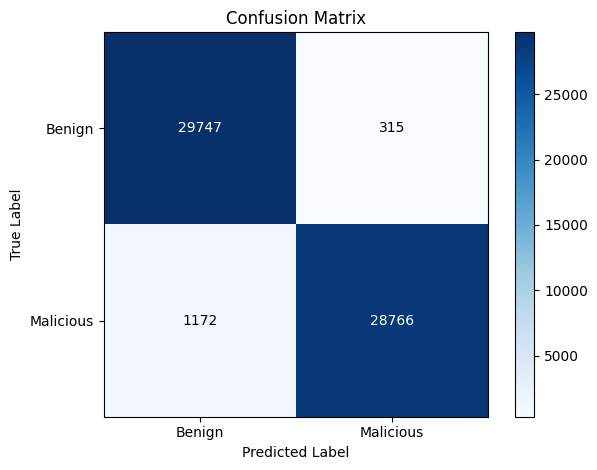

Threshold: 0.6
Accuracy: 0.9751
Confusion Matrix:
 [[29805   257]
 [ 1237 28701]]
Precision: 0.9911250776987361
Recall: 0.9586812746342441
False Positive Rate: 0.008548998735945713
False Negative Rate: 0.0413187253657559


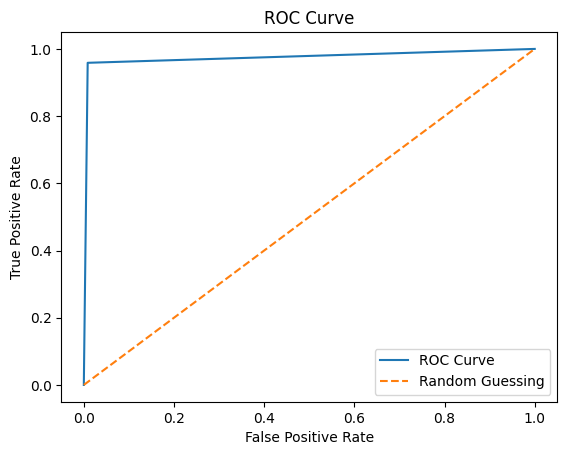

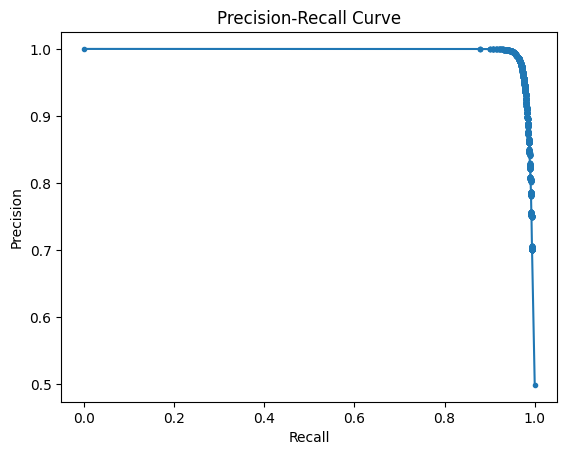

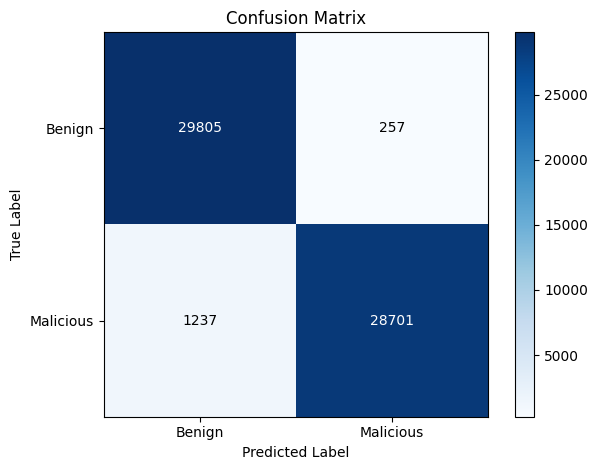

Threshold: 0.65
Accuracy: 0.9744833333333334
Confusion Matrix:
 [[29869   193]
 [ 1338 28600]]
Precision: 0.9932969819053242
Recall: 0.9553076357806133
False Positive Rate: 0.006420065198589581
False Negative Rate: 0.04469236421938673


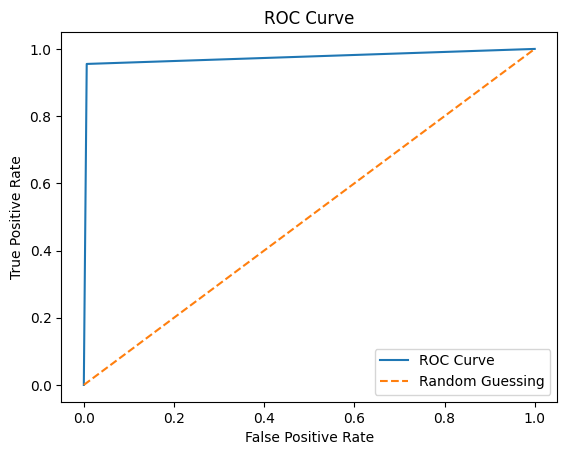

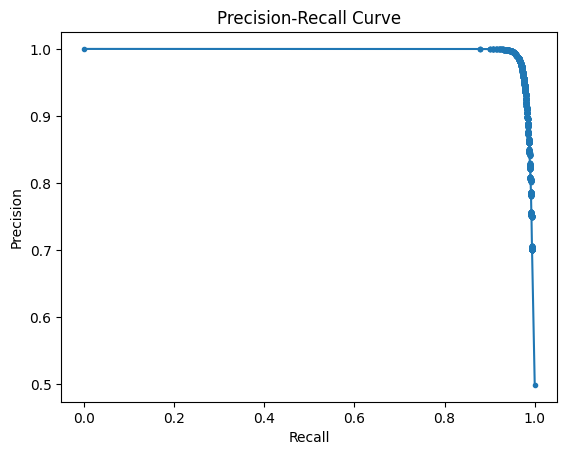

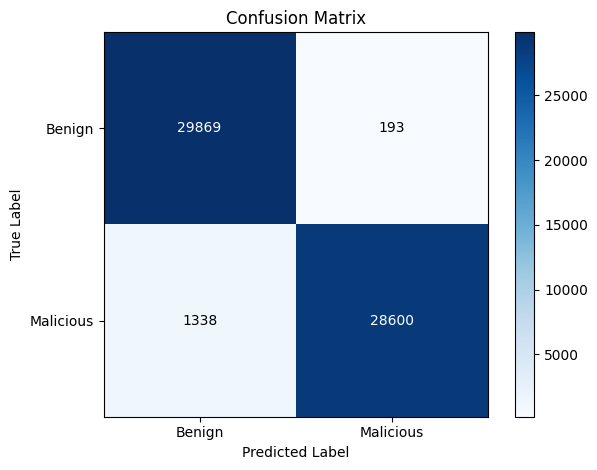

Threshold: 0.7
Accuracy: 0.9737
Confusion Matrix:
 [[29938   124]
 [ 1454 28484]]
Precision: 0.995665548098434
Recall: 0.951432961453671
False Positive Rate: 0.004124808728627504
False Negative Rate: 0.04856703854632908


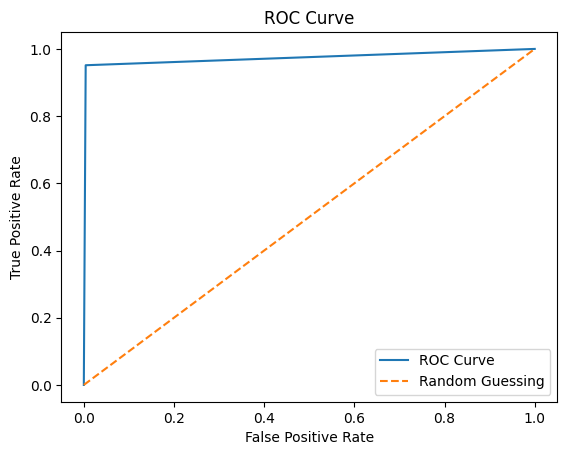

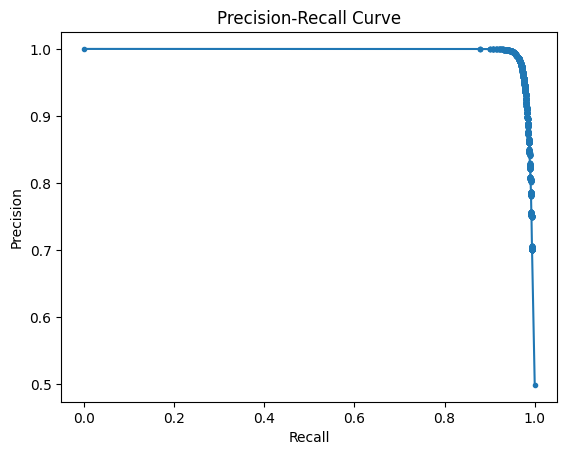

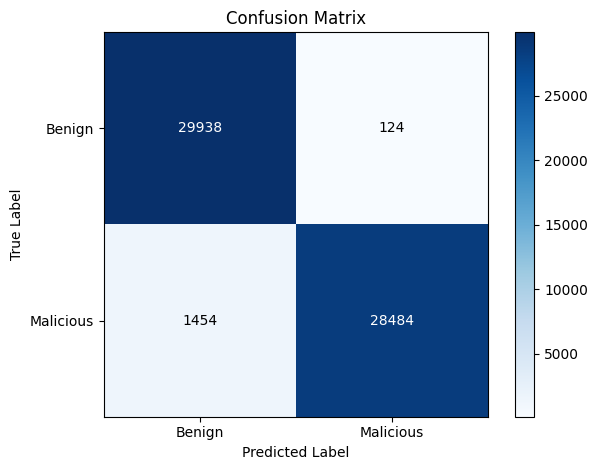

Threshold: 0.75
Accuracy: 0.9726166666666667
Confusion Matrix:
 [[29978    84]
 [ 1559 28379]]
Precision: 0.9970488001967467
Recall: 0.9479257131404903
False Positive Rate: 0.0027942252677799215
False Negative Rate: 0.052074286859509655


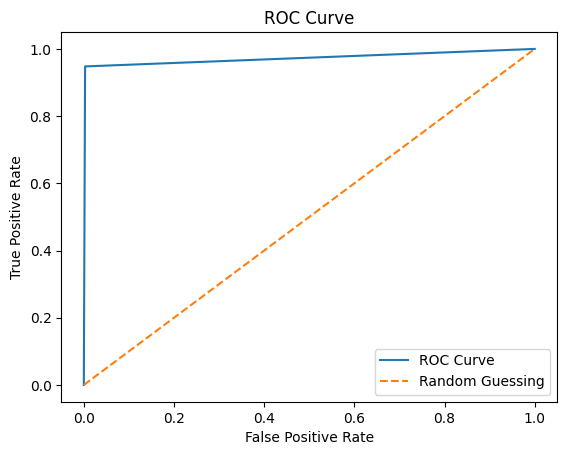

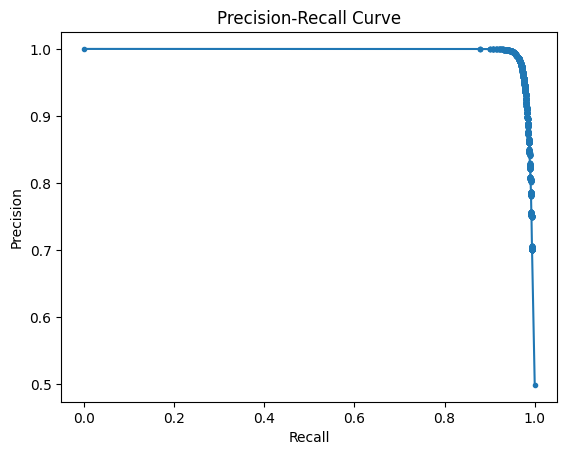

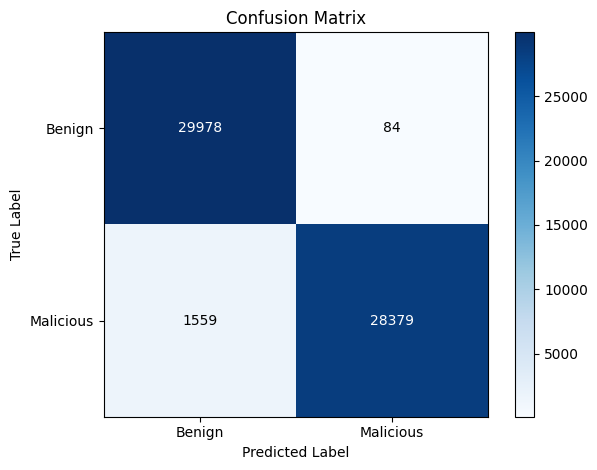

Threshold: 0.8
Accuracy: 0.9707333333333333
Confusion Matrix:
 [[29999    63]
 [ 1693 28245]]
Precision: 0.9977744807121661
Recall: 0.9434497962455742
False Positive Rate: 0.002095668950834941
False Negative Rate: 0.056550203754425814


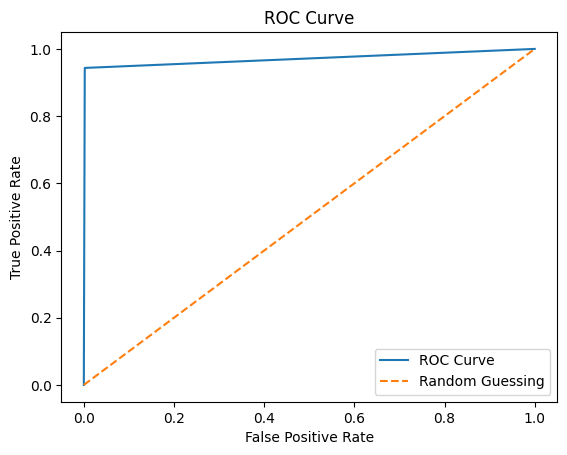

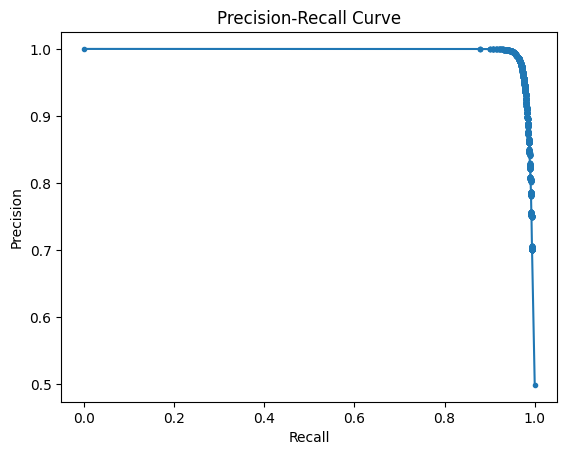

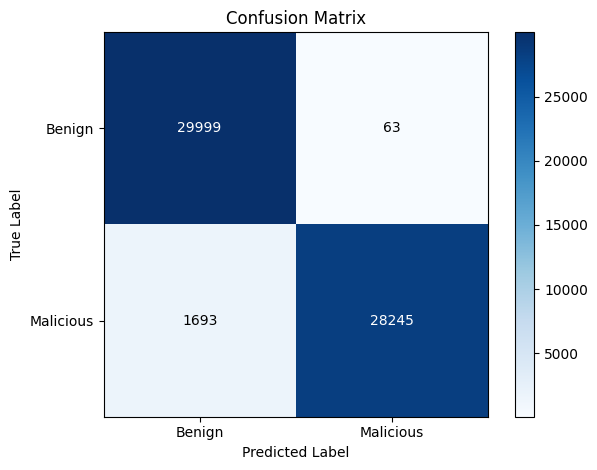

Threshold: 0.85
Accuracy: 0.9682833333333334
Confusion Matrix:
 [[30018    44]
 [ 1859 28079]]
Precision: 0.9984354442982613
Recall: 0.9379050036742601
False Positive Rate: 0.0014636418069323399
False Negative Rate: 0.062094996325739865


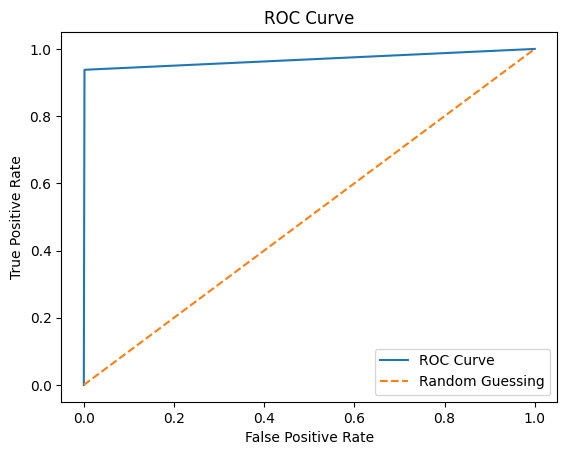

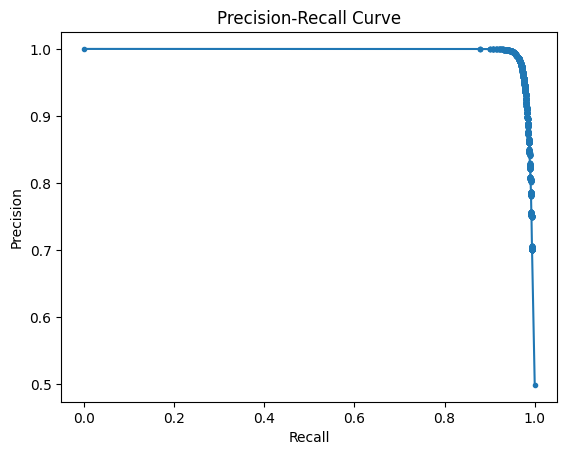

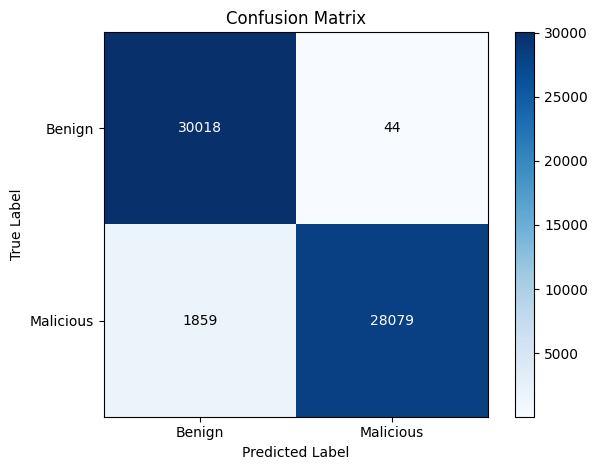

Threshold: 0.9
Accuracy: 0.9652333333333334
Confusion Matrix:
 [[30037    25]
 [ 2061 27877]]
Precision: 0.9991040068812271
Recall: 0.9311577259669984
False Positive Rate: 0.0008316146630297386
False Negative Rate: 0.06884227403300154


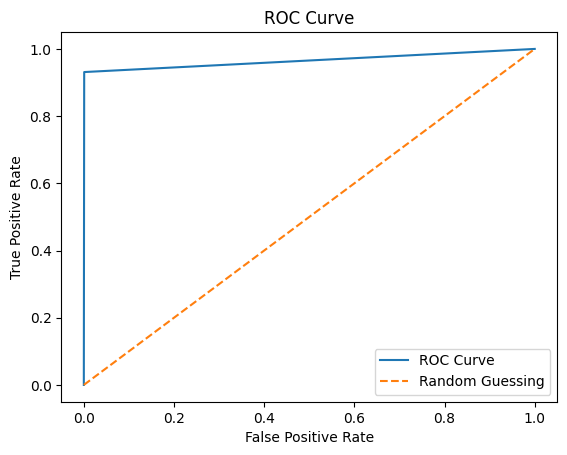

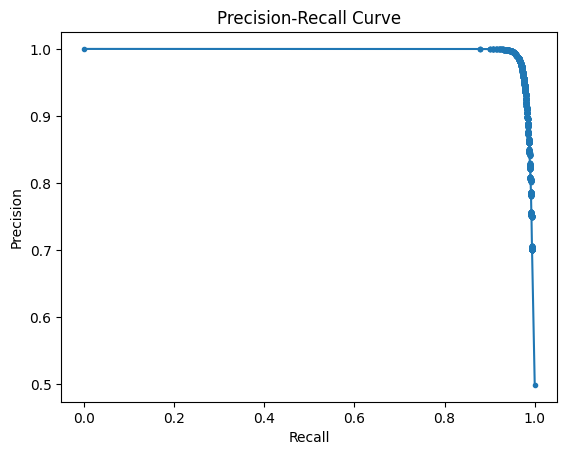

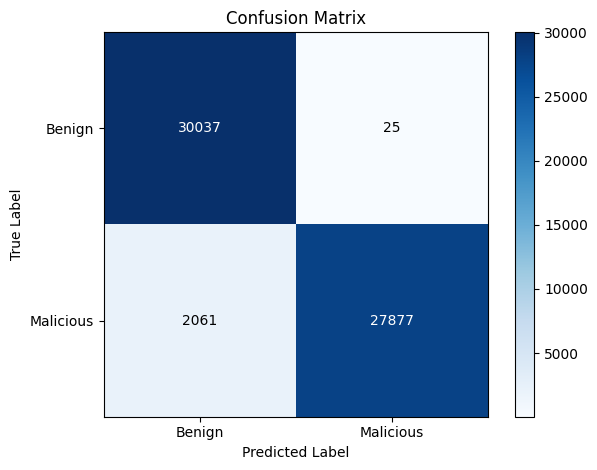

Threshold: 0.95
Accuracy: 0.96
Confusion Matrix:
 [[30047    15]
 [ 2385 27553]]
Precision: 0.999455890887986
Recall: 0.9203353597434698
False Positive Rate: 0.0004989687978178432
False Negative Rate: 0.07966464025653017


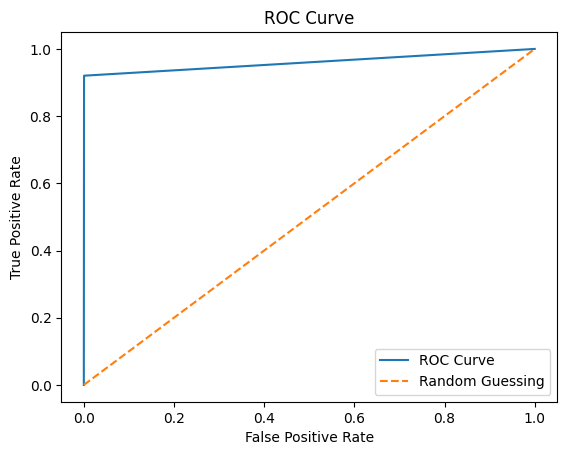

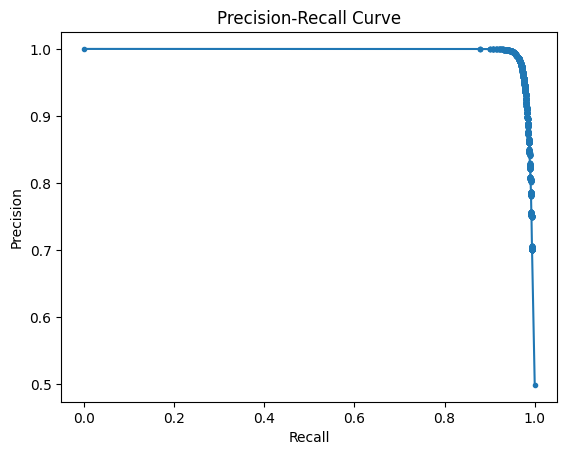

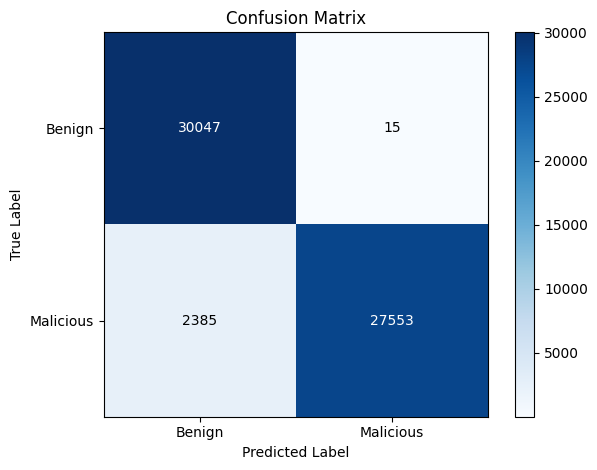

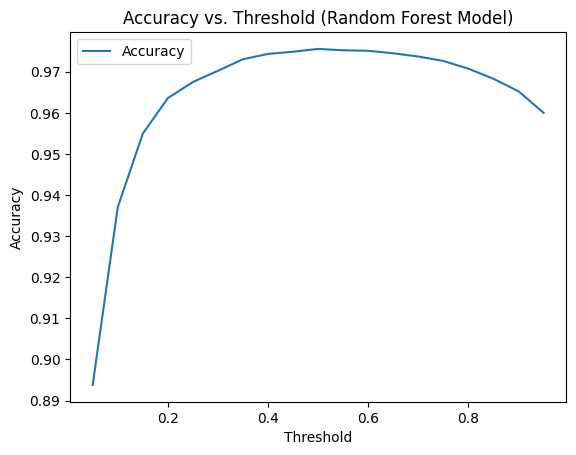

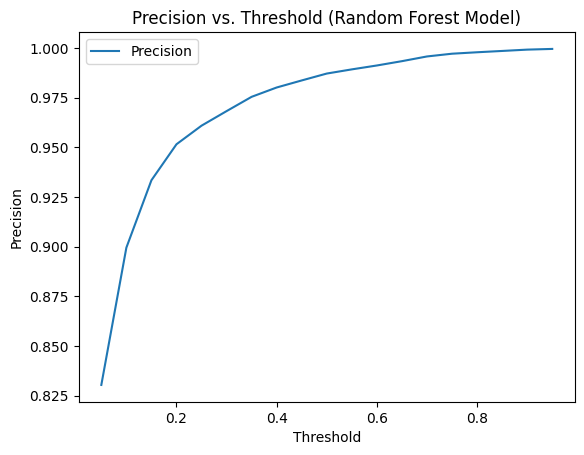

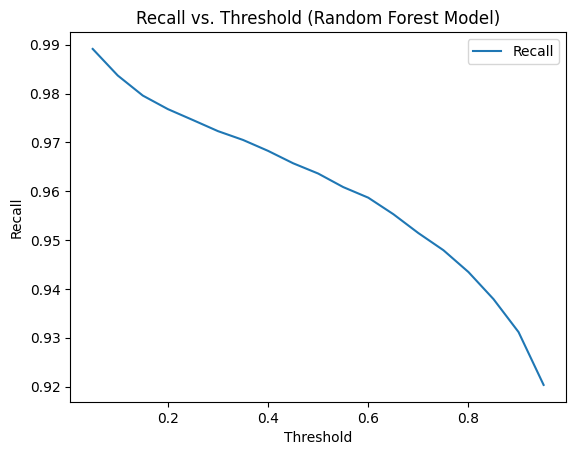

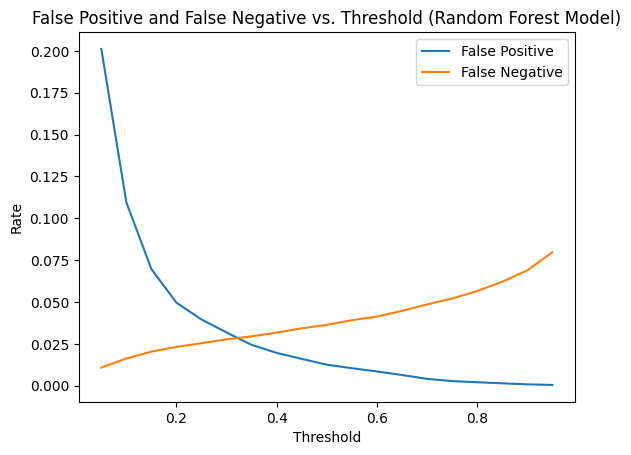

Maximum Accuracy: 0.97555
Best Threshold: 0.5


In [ ]:
# Feature Importance Plot
print('Feature Importance Plot for the Random Forest model...')
importances = rf_model.feature_importances_

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(np.arange(len(importances)), importances)
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importance Plot')
plt.show()

# Predictions and Evaluation
print('Making predictions with the Random Forest model...')
y_pred = rf_model.predict(X_test)
print('Testing the Random Forest model with different thresholds...')

# Initialize lists to store evaluation metrics
accuracy_list = []
precision_list = []
recall_list = []
false_positive_list = []
false_negative_list = []

# Define the thresholds to test
thresholds = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95]

max_accuracy = 0.0
best_threshold = 0.0

for threshold in thresholds:
    print('Threshold:', threshold)
    y_pred = (rf_model.predict_proba(X_test)[:,1] >= threshold).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    confusion = confusion_matrix(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    false_positive = confusion[0, 1] / (confusion[0, 1] + confusion[0, 0])
    false_negative = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])

    print("Accuracy:", accuracy)
    print("Confusion Matrix:\n", confusion)
    print("Precision:", precision)
    print("Recall:", recall)
    print("False Positive Rate:", false_positive)
    print("False Negative Rate:", false_negative)

    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    false_positive_list.append(false_positive)
    false_negative_list.append(false_negative)

    # Plot ROC curve, Precision-Recall curve, and Confusion Matrix
    plot_roc_curve(rf_model, X_test, y_test, threshold)
    plot_precision_recall_curve(rf_model, X_test, y_test, threshold)
    plot_confusion_matrix(rf_model, X_test, y_test, threshold)

    # Update max accuracy and best threshold if current accuracy is higher
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        best_threshold = threshold

# Plotting accuracy vs. threshold
plt.plot(thresholds, accuracy_list, label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold (Random Forest Model)')
plt.legend()
plt.show()

# Plotting precision vs. threshold
plt.plot(thresholds, precision_list, label='Precision')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision vs. Threshold (Random Forest Model)')
plt.legend()
plt.show()

# Plotting recall vs. threshold
plt.plot(thresholds, recall_list, label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Recall')
plt.title('Recall vs. Threshold (Random Forest Model)')
plt.legend()
plt.show()

# Plotting false positive and false negative rates vs. threshold
plt.plot(thresholds, false_positive_list, label='False Positive')
plt.plot(thresholds, false_negative_list, label='False Negative')
plt.xlabel('Threshold')
plt.ylabel('Rate')
plt.title('False Positive and False Negative vs. Threshold (Random Forest Model)')
plt.legend()
plt.show()

# Display maximum accuracy and best threshold
print('Maximum Accuracy:', max_accuracy)
print('Best Threshold:', best_threshold)

### K-Nearest Neighbors model
We will use K-nearest neighbors model to classify the URLs and evaluate the model using the test set. We'll use 490 neighbors.

In [ ]:
# K-Nearest Neighbors Classifier
print('Training the K-Nearest Neighbors model with k=490...')
knn_model = KNeighborsClassifier(n_neighbors=490)
knn_model.fit(X_train, y_train)
print('K-Nearest Neighbors model training complete.')

print('Saving the K-Nearest Neighbors model to disk...')

# Dump the model to disk
with open('knn_model.pkl', 'wb') as f:
    pkl.dump(knn_model, f)

print('K-Nearest Neighbors model saved to disk.')

Training the K-Nearest Neighbors model with k=490...
K-Nearest Neighbors model training complete.
Saving the K-Nearest Neighbors model to disk...
K-Nearest Neighbors model saved to disk.


#### Prediction and evaluation

In [ ]:
# Predictions and Evaluation
print('Making predictions with the K-Nearest Neighbors model...')
y_pred = knn_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Making predictions with the K-Nearest Neighbors model...
Accuracy: 0.91625
Confusion Matrix:
 [[29471   591]
 [ 4434 25504]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.98      0.92     30062
           1       0.98      0.85      0.91     29938

    accuracy                           0.92     60000
   macro avg       0.92      0.92      0.92     60000
weighted avg       0.92      0.92      0.92     60000



Accuracy: 0.91625
Confusion Matrix:
 [[29471   591]
 [ 4434 25504]]
Precision: 0.9773519831385323
Recall: 0.8518939140891175
False Positive Rate: 0.01965937063402302
False Negative Rate: 0.14810608591088248


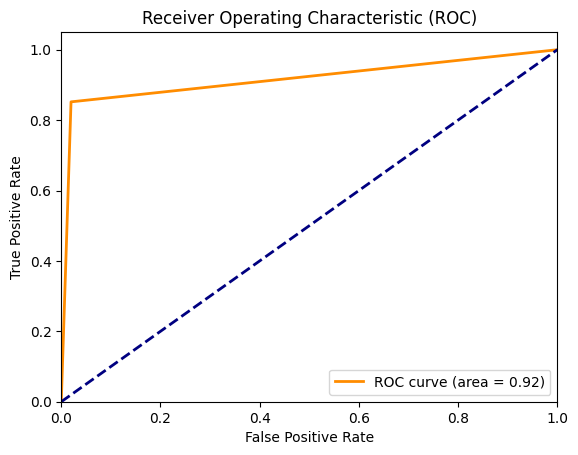

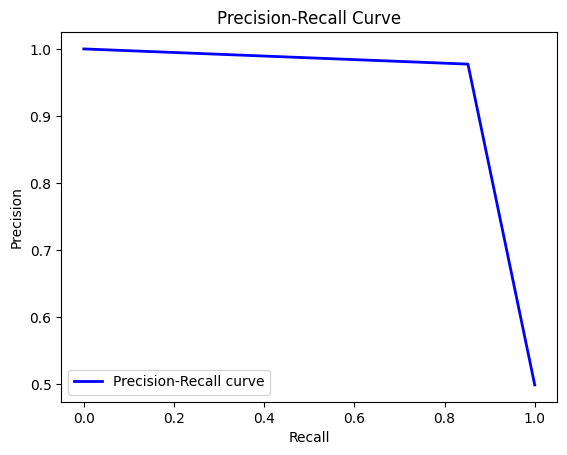

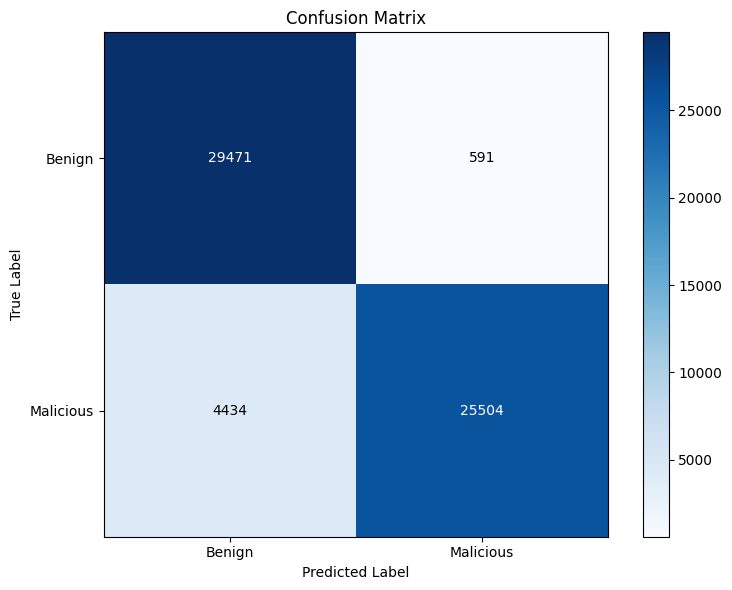

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
false_positive = confusion[0, 1] / (confusion[0, 1] + confusion[0, 0])
false_negative = confusion[1, 0] / (confusion[1, 0] + confusion[1, 1])

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Precision:", precision)
print("Recall:", recall)
print("False Positive Rate:", false_positive)
print("False Negative Rate:", false_negative)

# Plot ROC curve, Precision-Recall curve, and Confusion Matrix
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Benign', 'Malicious']  # Class labels
plt.xticks(ticks=[0, 1], labels=classes)
plt.yticks(ticks=[0, 1], labels=classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Add text annotations
thresh = confusion.max() / 2.
for i in range(confusion.shape[0]):
    for j in range(confusion.shape[1]):
        plt.text(j, i, format(confusion[i, j], 'd'),
                ha="center", va="center",
                color="white" if confusion[i, j] > thresh else "black")

plt.tight_layout()
plt.show()